#stringer orientation

## Pre-Notebook:

###User's Manual:


*   This is The Standard Notebook for The Group.
*   The Notebook is Named Standard-notebook, Change
*   The Notebook's Name According to The Task ou are Going to Do.

* __Naming Convention:__

  1- No Capital Letters.

  2- Try to Not Use Numbers as Possible.
  
  3- The Only Space Character Allowed is The Hyphen  "-".
  
  4- Try to Make The Name Informable, Precise, and Short.



### Mounting to Google Drive.


##### Note: make sure to open this notebook via the team's email account.

##### Team's E-mail Account: variraptorgeommu@gmail.com

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###importing libraries

In [ ]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

## Notebook:

### load data:

In [ ]:
import numpy as np
import pandas as pd
from IPython.display import display

In [ ]:
nuro_ornt = np.load('/content/drive/MyDrive/Stringer-spontaneous-Project-(Analysis)/dataset/dataset-files/stringer-orientations/stringer-orientations.npy', allow_pickle=True).item()
print(nuro_ornt.keys())

dict_keys(['sresp', 'istim', 'stat', 'u_spont', 'v_spont', 'mean_spont', 'std_spont', 'stimtimes', 'frametimes', 'camtimes', 'run', 'info', 'xyz'])


dat has fields:
* `dat['sresp']`: neurons by stimuli, a.k.a. the neural response data (23589 by 4598)
* `dat['xyz']`: three-dimensional position of each neuron in the brain.
* `dat['run']`: 1 by stimuli, a.k.a. the running speed of the animal in a.u.
* `dat['istim']`: 1 by stimuli, goes from 0 to 2*np.pi, the orientations shown on each trial
* `dat['u_spont']`: neurons by 128, the weights for the top 128 principal components of spontaneous activity. Unit norm.
* `dat['v_spont']`: 128 by 910, the timecourses for the top 128 PCs of spont activity.
* `dat['u_spont'] @ dat['v_spont']`: a reconstruction of the spontaneous activity for 910 timepoints interspersed throughout the recording.
* `dat['stat']`: 1 by neurons, some statistics for each neuron, see Suite2p for full documentation.


In [ ]:
nuro_spon = np.load('/content/drive/MyDrive/Stringer-spontaneous-Project-(Analysis)/dataset/dataset-files/stringer-spontaneous/stringer-spontaneous.npy', allow_pickle=True).item()
print(nuro_spon.keys())

dict_keys(['sresp', 'run', 'beh_svd_time', 'beh_svd_mask', 'stat', 'pupilArea', 'pupilCOM', 'xyz'])



dat has fields:
* `dat['sresp']`: neurons by timebins, a.k.a. the neural response data (11983 by 7018). Timebin = 1.2 sec.
* `dat['run']`: timebins by 1, a.k.a. the running speed of the animal in a.u.
* `dat['xyz']`: three-dimensional position of each neuron in the brain.
* `dat['pupilArea']`: timebins by 1, see FaceMap for details on the pupil tracker
* `dat['pupilCOM']`: timebins by 2, correspond to X and Y position. See FaceMap for details on the pupil tracker.
* `dat['beh_svd_time']`: timebins by 1,000. Timecourses of behavioral SVDs extracted from face movies. See FaceMap for details.
* `dat['beh_svd_mask']`: 240 by 320 by 1,000. Spatial masks of behavioral SVDs. Roughly normalized to each other.
* `dat['beh_svd_mask'] @ dat['beh_svd_time'][T, :]`:  reconstruction of the face movie (its motion energy) for frame T
* `dat['stat']`: 1 by neurons, some statistics for each neuron, see Suite2p for full documentation.

In [ ]:
pd.DataFrame(nuro_ornt['sresp'])

0          1          2           3           4          5     \
0       53.483261  63.134762  62.432125  156.087830  374.028961  63.386662   
1       20.518503   2.379957   0.000000    0.000000    5.017585   2.397176   
2        0.000000   0.000000   0.000000    6.526441    1.136153   0.000000   
3      578.916809  14.064929   0.000000  586.897522   20.846800  91.444481   
4        1.836931   6.834842  12.260544    2.147522    0.000000   0.000000   
...           ...        ...        ...         ...         ...        ...   
23584    0.000000   0.000000   5.905285    2.372391   11.290267   0.000000   
23585    3.518415   4.695301   0.000000    0.000000    0.000000   0.696216   
23586    0.000000   0.000000   4.990420    0.000000    0.000000  13.825993   
23587   16.479868   0.000000   5.061645    0.000000    0.000000   0.000000   
23588    7.973795   0.000000  31.222448    0.000000    0.000000   0.000000   

            6          7         8          9     ...         4588  \
0       0.000000  34.681080  0.499633   2.475683  ...     0.000000   
1       0.000000   0.618409  0.000000   0.000000  ...    69.683777   
2      14.185391   0.000000  0.000000   5.382135  ...     0.000000   
3       0.000000   0.000000  0.000000   0.000000  ...  1033.119507   
4       0.000000   0.000000  0.000000  15.978809  ...    42.948841   
...          ...        ...       ...        ...  ...          ...   
23584   0.000000   0.000000  0.000000   0.000000  ...     0.000000   
23585   2.640064   0.000000  0.000000   1.182349  ...     0.000000   
23586   0.000000  15.988823  0.000000   2.477597  ...     0.000000   
23587   0.000000   2.381921  3.190627   6.714071  ...     0.000000   
23588   0.000000   0.000000  4.019590   6.661022  ...     0.000000   

             4589        4590        4591       4592       4593       4594  \
0        3.900965    1.634272    0.636133   0.000000   0.000000   0.000000   
1       74.929726   10.386744   47.782207   0.000000   0.000000   0.000000   
2        0.000000   28.795988   12.760293   0.000000   0.137050   0.000000   
3      816.178467  169.079025  263.686035  73.718864   0.000000   0.000000   
4        0.509754    9.655540    0.000000   0.501553  15.271520   0.000000   
...           ...         ...         ...        ...        ...        ...   
23584   16.654892    0.121929   11.362716  14.861847   0.000000  13.600766   
23585    1.297922    1.226227    0.226649   0.000000   0.000000   0.000000   
23586    3.292549    0.000000    0.000000   3.953462   5.113644   0.000000   
23587    3.079573    0.000000   15.371961   0.000000   0.000000   0.000000   
23588    0.000000   23.241776    0.000000   0.000000  79.129387   0.000000   

            4595      4596       4597  
0       0.862968  1.072990   7.599448  
1       0.000000  0.000000   0.000000  
2       9.897470  5.406824   0.000000  
3       0.000000  0.000000   0.000000  
4       0.000000  0.000000   0.000000  
...          ...       ...        ...  
23584   0.000000  3.041414   4.356057  
23585   1.413638  0.000000   0.000000  
23586   0.000000  1.516158   2.209706  
23587   0.000000  0.000000   0.000000  
23588  18.112780  0.000000  24.309656  

[23589 rows x 4598 columns]

In [ ]:
pd.DataFrame(nuro_spon['sresp'])

0           1           2           3          4          5     \
0       2.982083    8.409119   12.720393    0.000000   0.000000   7.274833   
1       5.001608    9.838382    4.246386    3.744134  16.891184   4.996648   
2       7.689009    4.740472    3.765824    7.232076   0.000000   7.902078   
3       7.469154    5.175084    7.111603   14.160844   0.000000   2.697218   
4      10.461974    0.000000    8.659038    1.334573  14.634576  19.232573   
...          ...         ...         ...         ...        ...        ...   
11978   0.000000  133.711212  111.635338   87.892609   0.000000   0.000000   
11979  84.098610    0.000000   39.376881  119.110176   0.000000  25.385851   
11980  91.947937   14.375244   78.326202    0.000000  34.821697  38.966228   
11981   0.000000   43.836548  139.181580  185.570602   0.000000  17.590347   
11982   1.149018    1.832320    4.561337    3.653614   0.794143   0.574530   

             6          7           8          9     ...       7008  \
0       18.580465   3.790220    3.413756   3.118203  ...  24.114042   
1        4.750867   0.000000   13.498225   0.000000  ...   0.000000   
2        0.000000  21.504387    0.000000   2.656121  ...   0.000000   
3        0.000000   4.248384    9.388747   0.000000  ...   0.000000   
4       23.074234   0.952631   38.005444   0.000000  ...  12.351256   
...           ...        ...         ...        ...  ...        ...   
11978  329.318329   0.000000    6.114675  79.033806  ...   0.000000   
11979   75.043388  58.726803    0.000000  58.270153  ...  67.824318   
11980    3.507966  17.903570  121.837189   0.000000  ...  58.668507   
11981  181.031815   0.000000  127.407982   0.000000  ...   8.399830   
11982    7.285809   8.105125    0.000000   0.000000  ...   5.932291   

            7009        7010        7011        7012       7013       7014  \
0       0.000000    0.636476    0.000000   19.501078  12.836020  13.076774   
1      16.181263    1.525913    3.646461    4.747268   0.000000   8.318789   
2      11.954147    3.390892   11.205808    0.557856   5.315800   1.833244   
3       0.000000    3.689500   54.149017   29.296286  51.976223  17.885351   
4       0.000000    2.250427   35.598515   15.900043   8.519535  32.273228   
...          ...         ...         ...         ...        ...        ...   
11978   0.000000  249.244736  156.273163  235.666031  54.842514  10.781943   
11979   0.000000    0.000000   59.802227   23.059797  55.034931  20.041687   
11980  32.586658    0.000000   39.682907   15.469842  71.024422  33.460781   
11981  71.050217   69.415779   16.534502   27.911169   0.000000  93.172417   
11982   0.923171    0.271248    1.851835    5.112932   0.223907   3.025923   

            7015        7016        7017  
0       0.000000   11.900859    7.561272  
1       0.000000    0.000000   17.174635  
2       6.516010    4.359752    2.812348  
3       0.000000    0.286546   15.121470  
4       0.000000    8.920449   40.540108  
...          ...         ...         ...  
11978  61.965534  144.991989  127.725250  
11979  59.920879   63.978939  118.058861  
11980   0.000000   38.051830  117.867554  
11981  98.847816    0.000000  126.349998  
11982   0.000000    3.276081    0.155072  

[11983 rows x 7018 columns]

In [ ]:
ornt_fields_dfs = {}

for field in nuro_ornt.keys():
  if field == 'info':
    continue
  print('keys converted inot dataframes: ', field)
  ornt_fields_dfs[field] = pd.DataFrame(nuro_ornt[field])

keys converted inot dataframes:  sresp
keys converted inot dataframes:  istim
keys converted inot dataframes:  stat
keys converted inot dataframes:  u_spont
keys converted inot dataframes:  v_spont
keys converted inot dataframes:  mean_spont
keys converted inot dataframes:  std_spont
keys converted inot dataframes:  stimtimes
keys converted inot dataframes:  frametimes
keys converted inot dataframes:  camtimes
keys converted inot dataframes:  run
keys converted inot dataframes:  xyz


In [ ]:
spon_fields_dfs = {}

for field in nuro_spon.keys():
  if (field == 'beh_svd_mask') or (field == 'stat'):
    continue
  print('keys converted inot dataframes: ', field)
  spon_fields_dfs[field] = pd.DataFrame(nuro_spon[field])

keys converted inot dataframes:  sresp
keys converted inot dataframes:  run
keys converted inot dataframes:  beh_svd_time
keys converted inot dataframes:  pupilArea
keys converted inot dataframes:  pupilCOM
keys converted inot dataframes:  xyz


In [ ]:
ornt_fields_dfs['xyz'] = ornt_fields_dfs['xyz'].T
spon_fields_dfs['xyz'] = spon_fields_dfs['xyz'].T

In [ ]:
for df_name, field in ornt_fields_dfs.items():
  print(f"Dataframe name: {df_name}")
  display(field)
  print('\n')

Dataframe name: sresp


0          1          2           3           4          5     \
0       53.483261  63.134762  62.432125  156.087830  374.028961  63.386662   
1       20.518503   2.379957   0.000000    0.000000    5.017585   2.397176   
2        0.000000   0.000000   0.000000    6.526441    1.136153   0.000000   
3      578.916809  14.064929   0.000000  586.897522   20.846800  91.444481   
4        1.836931   6.834842  12.260544    2.147522    0.000000   0.000000   
...           ...        ...        ...         ...         ...        ...   
23584    0.000000   0.000000   5.905285    2.372391   11.290267   0.000000   
23585    3.518415   4.695301   0.000000    0.000000    0.000000   0.696216   
23586    0.000000   0.000000   4.990420    0.000000    0.000000  13.825993   
23587   16.479868   0.000000   5.061645    0.000000    0.000000   0.000000   
23588    7.973795   0.000000  31.222448    0.000000    0.000000   0.000000   

            6          7         8          9     ...         4588  \
0       0.000000  34.681080  0.499633   2.475683  ...     0.000000   
1       0.000000   0.618409  0.000000   0.000000  ...    69.683777   
2      14.185391   0.000000  0.000000   5.382135  ...     0.000000   
3       0.000000   0.000000  0.000000   0.000000  ...  1033.119507   
4       0.000000   0.000000  0.000000  15.978809  ...    42.948841   
...          ...        ...       ...        ...  ...          ...   
23584   0.000000   0.000000  0.000000   0.000000  ...     0.000000   
23585   2.640064   0.000000  0.000000   1.182349  ...     0.000000   
23586   0.000000  15.988823  0.000000   2.477597  ...     0.000000   
23587   0.000000   2.381921  3.190627   6.714071  ...     0.000000   
23588   0.000000   0.000000  4.019590   6.661022  ...     0.000000   

             4589        4590        4591       4592       4593       4594  \
0        3.900965    1.634272    0.636133   0.000000   0.000000   0.000000   
1       74.929726   10.386744   47.782207   0.000000   0.000000   0.000000   
2        0.000000   28.795988   12.760293   0.000000   0.137050   0.000000   
3      816.178467  169.079025  263.686035  73.718864   0.000000   0.000000   
4        0.509754    9.655540    0.000000   0.501553  15.271520   0.000000   
...           ...         ...         ...        ...        ...        ...   
23584   16.654892    0.121929   11.362716  14.861847   0.000000  13.600766   
23585    1.297922    1.226227    0.226649   0.000000   0.000000   0.000000   
23586    3.292549    0.000000    0.000000   3.953462   5.113644   0.000000   
23587    3.079573    0.000000   15.371961   0.000000   0.000000   0.000000   
23588    0.000000   23.241776    0.000000   0.000000  79.129387   0.000000   

            4595      4596       4597  
0       0.862968  1.072990   7.599448  
1       0.000000  0.000000   0.000000  
2       9.897470  5.406824   0.000000  
3       0.000000  0.000000   0.000000  
4       0.000000  0.000000   0.000000  
...          ...       ...        ...  
23584   0.000000  3.041414   4.356057  
23585   1.413638  0.000000   0.000000  
23586   0.000000  1.516158   2.209706  
23587   0.000000  0.000000   0.000000  
23588  18.112780  0.000000  24.309656  

[23589 rows x 4598 columns]



Dataframe name: istim


0
0     2.620227
1     4.525932
2     0.000719
3     1.899612
4     0.922094
...        ...
4593  5.958334
4594  1.826415
4595  2.765522
4596  0.666379
4597  5.512126

[4598 rows x 1 columns]



Dataframe name: stat


0
0      {'ypix': [220, 220, 220, 221, 221, 221, 221, 2...
1      {'ypix': [535, 535, 535, 535, 535, 536, 536, 5...
2      {'ypix': [168, 168, 168, 168, 169, 169, 169, 1...
3      {'ypix': [12, 12, 12, 12, 12, 12, 12, 12, 13, ...
4      {'ypix': [494, 494, 495, 495, 495, 495, 495, 4...
...                                                  ...
23584  {'ypix': [237, 237, 238, 238, 238, 238, 238, 2...
23585  {'ypix': [558, 558, 558, 558, 559, 559, 559, 5...
23586  {'ypix': [107, 107, 107, 108, 108, 108, 108, 1...
23587  {'ypix': [378, 379, 379, 379, 379, 379, 379, 3...
23588  {'ypix': [120, 120, 120, 120, 120, 120, 120, 1...

[23589 rows x 1 columns]



Dataframe name: u_spont


0         1         2         3         4         5         6    \
0     -0.005386  0.003281  0.016051  0.009521  0.019126  0.012430 -0.006559   
1     -0.006662 -0.009706 -0.002492 -0.015328 -0.007295  0.003666 -0.010113   
2      0.005522 -0.023796 -0.006939  0.005345  0.000071 -0.000436 -0.003493   
3     -0.003836 -0.007587  0.013485 -0.003729  0.022012  0.009934 -0.010826   
4      0.002745  0.025182 -0.002970 -0.011181  0.007516  0.000858 -0.006893   
...         ...       ...       ...       ...       ...       ...       ...   
23584 -0.011874 -0.006365  0.008707  0.007292  0.005367 -0.001584 -0.006720   
23585 -0.005245 -0.002819 -0.004487 -0.001532  0.002046  0.002924 -0.008714   
23586  0.004327  0.012426 -0.000564  0.004022 -0.001066 -0.000316  0.000244   
23587 -0.014498  0.001311  0.002818 -0.008543 -0.025305  0.010870 -0.002039   
23588 -0.012266  0.000856 -0.001553 -0.003533 -0.002578 -0.003825 -0.002481   

            7         8         9    ...       118       119       120  \
0      0.005196  0.006418 -0.010884  ... -0.005637  0.001048  0.005228   
1      0.005419 -0.016259  0.001061  ...  0.000606 -0.003396  0.005966   
2      0.017628 -0.014305  0.010077  ...  0.007211  0.005026 -0.006109   
3      0.002019 -0.010975 -0.000856  ... -0.007018  0.009013 -0.010361   
4      0.002164  0.008115  0.000009  ...  0.006793  0.002515  0.000360   
...         ...       ...       ...  ...       ...       ...       ...   
23584  0.008134  0.008325 -0.001243  ...  0.003332  0.003519 -0.000629   
23585  0.004360  0.004450 -0.001914  ... -0.006903 -0.008660 -0.007792   
23586 -0.007312  0.002086 -0.001509  ...  0.009158 -0.005222  0.003522   
23587  0.007543  0.003025 -0.011762  ... -0.007451  0.001248 -0.005395   
23588 -0.005009 -0.001912 -0.002272  ...  0.000172  0.006205 -0.010166   

            121       122       123       124       125       126       127  
0      0.000908  0.000802 -0.003657  0.002307  0.004802  0.008079 -0.003881  
1     -0.005873 -0.009015  0.004403  0.000636  0.003682  0.005292 -0.005738  
2      0.006151  0.002881  0.000500  0.004897 -0.003700 -0.003485 -0.002434  
3      0.008563  0.007684  0.004904 -0.001898 -0.014088 -0.001843  0.000453  
4      0.010858  0.000505 -0.006087  0.002778  0.002053 -0.002311 -0.001421  
...         ...       ...       ...       ...       ...       ...       ...  
23584  0.001818  0.002012 -0.012498  0.003282 -0.003209  0.001262 -0.010869  
23585  0.001961  0.008364  0.001935  0.000488 -0.010148  0.001278  0.004605  
23586  0.006112  0.004050 -0.010589  0.010478  0.006159  0.009033  0.010299  
23587  0.003225  0.008154  0.001204 -0.001614 -0.008196 -0.014910  0.006300  
23588 -0.001873 -0.003743 -0.005313 -0.005129  0.003356 -0.007522 -0.014836  

[23589 rows x 128 columns]



Dataframe name: v_spont


0          1          2          3          4          5    \
0    14.961424   4.860940   1.055348   1.543761  -3.527510   1.992715   
1    27.352426  39.159779  44.458582  47.651540  46.555447  47.907432   
2   -11.683111 -25.516797 -27.962429 -32.108429 -31.532044 -30.551495   
3     5.296761  13.314068  16.814344  16.801388  19.101669  19.181168   
4    -1.059091  -3.300674  -0.978896  -4.060917  -1.386084  -4.178889   
..         ...        ...        ...        ...        ...        ...   
123  -4.627604  -8.249941  -1.161064   2.050174   4.297602   2.593172   
124   1.480915  -0.904282  -3.216067  -5.412593   6.877349   6.073546   
125   6.821689   5.221665   6.162122  -3.022947  -1.833235  -5.257943   
126  -7.093558  -7.422200  -2.332313   9.374448   2.101539   2.524477   
127   0.842146  -0.491887  -1.127213   4.969409   0.027225   0.654848   

           6          7          8          9    ...        900        901  \
0     3.520931   3.966482   4.221240  12.209925  ...  -8.747615  -6.232877   
1    52.434233  49.287812  46.142372  24.694424  ... -23.914452 -24.921574   
2   -32.152763 -34.174890 -34.780596 -23.691257  ...  10.825961  13.950962   
3    21.955184  21.825266  18.143420   9.869856  ...   7.978580  11.531875   
4    -3.155182  -7.778210  -8.753842 -11.004434  ...   7.114405  18.647384   
..         ...        ...        ...        ...  ...        ...        ...   
123  -4.442863  -1.133733   2.625432  -2.114351  ...   2.115009   4.989178   
124   7.935525   4.148913 -10.652940  -7.304532  ...   0.372920   0.015977   
125  -2.709463   3.777164   0.124846  -0.579711  ...  -3.547908  -7.710254   
126   3.204323   6.635947  -2.236699  -1.788576  ...  -0.630057   6.474170   
127   4.248221  10.512953  11.228890   0.917317  ...   2.905713  -2.234147   

           902        903        904        905        906        907  \
0     5.460868  14.189674  15.073635  12.815869  11.826081   5.602260   
1   -22.488046 -22.755903 -23.521070 -23.839497 -24.463791 -27.710424   
2    22.017696  20.903107  23.219314  23.706308  19.961797  15.276345   
3    11.602586  10.065377   7.820367   9.562652   8.857165   3.605490   
4    17.039810   0.956580  -0.462768  -1.918671  -4.749797 -13.023025   
..         ...        ...        ...        ...        ...        ...   
123   5.527646   1.857640   2.548229   2.235287   0.600263  -3.909487   
124  -3.132977  -1.927657  -0.773300  -3.754346  -0.150246  -4.296321   
125  -3.239068   0.792611   2.873808   3.278710   1.577439   2.459679   
126   0.260169   0.055698   0.306756  -4.605425  -3.405572  -2.712647   
127  -2.320366  -1.807761   0.636963  -2.376914  -1.340251  -3.304517   

           908        909  
0   -11.030015  -0.030337  
1   -26.626467 -23.274605  
2    21.089338  11.157945  
3     5.129089   0.685465  
4   -19.279559 -12.184296  
..         ...        ...  
123 -15.602638  -2.646124  
124  -8.091501  -3.651376  
125   3.499695  -5.617553  
126  -9.952636  -0.352030  
127  -3.754871  -2.190578  

[128 rows x 910 columns]



Dataframe name: mean_spont


0
0      160.056588
1      281.094554
2      382.853978
3      480.990995
4       72.275978
...           ...
23584    6.367591
23585    1.350834
23586    3.208624
23587    1.233353
23588    1.601429

[23589 rows x 1 columns]



Dataframe name: std_spont


0
0       93.961812
1      226.087717
2      293.620263
3      292.324719
4       93.336656
...           ...
23584    7.705494
23585    2.086764
23586    4.193780
23587    3.263212
23588    2.987507

[23589 rows x 1 columns]



Dataframe name: stimtimes


0
0         1
1         6
2        11
3        16
4        21
...     ...
4593  25816
4594  25821
4595  25826
4596  25831
4597  25836

[4598 rows x 1 columns]



Dataframe name: frametimes


0
0          8119
1          9862
2         11604
3         13347
4         15090
...         ...
25834  45049694
25835  45051438
25836  45053181
25837  45054925
25838  45056668

[25839 rows x 1 columns]



Dataframe name: camtimes


0
0           1892
1           1992
2           2092
3           2192
4           2292
...          ...
450533  45055192
450534  45055292
450535  45055392
450536  45055492
450537  45055592

[450538 rows x 1 columns]



Dataframe name: run


0
0     4.990662
1     0.075770
2     5.252225
3     2.850591
4     0.003781
...        ...
4593  0.000000
4594  0.000000
4595  0.000000
4596  0.000000
4597  0.000000

[4598 rows x 1 columns]



Dataframe name: xyz


0       1      2
0       448.0   26.60 -150.0
1      1080.0  119.70 -150.0
2       342.0  200.83 -150.0
3        32.0  591.85 -150.0
4       996.0  208.81 -150.0
...       ...     ...    ...
23584   482.0  224.77 -450.0
23585  1122.0  139.65 -450.0
23586   221.0  506.73 -450.0
23587   766.0   70.49 -450.0
23588   246.0  166.25 -450.0

[23589 rows x 3 columns]

In [ ]:
for df_name, field in spon_fields_dfs.items():
  print(f"Dataframe name: {df_name}")
  display(field)
  print('\n')

Dataframe name: sresp


0           1           2           3          4          5     \
0       2.982083    8.409119   12.720393    0.000000   0.000000   7.274833   
1       5.001608    9.838382    4.246386    3.744134  16.891184   4.996648   
2       7.689009    4.740472    3.765824    7.232076   0.000000   7.902078   
3       7.469154    5.175084    7.111603   14.160844   0.000000   2.697218   
4      10.461974    0.000000    8.659038    1.334573  14.634576  19.232573   
...          ...         ...         ...         ...        ...        ...   
11978   0.000000  133.711212  111.635338   87.892609   0.000000   0.000000   
11979  84.098610    0.000000   39.376881  119.110176   0.000000  25.385851   
11980  91.947937   14.375244   78.326202    0.000000  34.821697  38.966228   
11981   0.000000   43.836548  139.181580  185.570602   0.000000  17.590347   
11982   1.149018    1.832320    4.561337    3.653614   0.794143   0.574530   

             6          7           8          9     ...       7008  \
0       18.580465   3.790220    3.413756   3.118203  ...  24.114042   
1        4.750867   0.000000   13.498225   0.000000  ...   0.000000   
2        0.000000  21.504387    0.000000   2.656121  ...   0.000000   
3        0.000000   4.248384    9.388747   0.000000  ...   0.000000   
4       23.074234   0.952631   38.005444   0.000000  ...  12.351256   
...           ...        ...         ...        ...  ...        ...   
11978  329.318329   0.000000    6.114675  79.033806  ...   0.000000   
11979   75.043388  58.726803    0.000000  58.270153  ...  67.824318   
11980    3.507966  17.903570  121.837189   0.000000  ...  58.668507   
11981  181.031815   0.000000  127.407982   0.000000  ...   8.399830   
11982    7.285809   8.105125    0.000000   0.000000  ...   5.932291   

            7009        7010        7011        7012       7013       7014  \
0       0.000000    0.636476    0.000000   19.501078  12.836020  13.076774   
1      16.181263    1.525913    3.646461    4.747268   0.000000   8.318789   
2      11.954147    3.390892   11.205808    0.557856   5.315800   1.833244   
3       0.000000    3.689500   54.149017   29.296286  51.976223  17.885351   
4       0.000000    2.250427   35.598515   15.900043   8.519535  32.273228   
...          ...         ...         ...         ...        ...        ...   
11978   0.000000  249.244736  156.273163  235.666031  54.842514  10.781943   
11979   0.000000    0.000000   59.802227   23.059797  55.034931  20.041687   
11980  32.586658    0.000000   39.682907   15.469842  71.024422  33.460781   
11981  71.050217   69.415779   16.534502   27.911169   0.000000  93.172417   
11982   0.923171    0.271248    1.851835    5.112932   0.223907   3.025923   

            7015        7016        7017  
0       0.000000   11.900859    7.561272  
1       0.000000    0.000000   17.174635  
2       6.516010    4.359752    2.812348  
3       0.000000    0.286546   15.121470  
4       0.000000    8.920449   40.540108  
...          ...         ...         ...  
11978  61.965534  144.991989  127.725250  
11979  59.920879   63.978939  118.058861  
11980   0.000000   38.051830  117.867554  
11981  98.847816    0.000000  126.349998  
11982   0.000000    3.276081    0.155072  

[11983 rows x 7018 columns]



Dataframe name: run


0
0      0.043625
1      5.688507
2      9.130915
3     16.939346
4     17.465670
...         ...
7013   4.055289
7014   0.269357
7015   3.768623
7016   9.793047
7017   7.664720

[7018 rows x 1 columns]



Dataframe name: beh_svd_time


0           1           2           3           4           5    \
0     -449.664480  159.789032  112.182965 -279.689509 -124.189030  -60.234119   
1    -2929.387126  532.135651  346.361771  460.544159  111.210375  369.647471   
2    -2622.562337 -392.177490  561.272064  220.761691 -194.141271 -158.056543   
3    -2310.152100   12.880535  490.603963  213.286959  -79.923289  125.092306   
4    -2618.708903 -370.473877  157.789605  317.926875 -232.439735    1.214119   
...           ...         ...         ...         ...         ...         ...   
7013 -1801.351725 -609.268473 -372.858754 -250.810165  -58.694550   51.511035   
7014  -649.384349 -247.568583 -146.650871 -312.070424 -145.455002   -3.755042   
7015    22.809790 -157.975942  -66.373528 -180.577387 -212.183487    4.983705   
7016 -1975.358114   31.857151  -56.415591  125.978261  -31.106984  217.995107   
7017 -2583.504883  374.165629  184.421626  140.166247  128.799337  101.504817   

             6           7           8           9    ...        990  \
0     -93.742994  -80.174622 -231.961802   56.644805  ...  -7.873819   
1    -259.267766  -13.539310  -82.995794 -117.879168  ...  10.320946   
2    -300.902857  156.666890  -88.564634   92.458801  ...   3.364264   
3    -243.253469   19.224906  -22.887792  -76.081312  ...   1.117687   
4    -196.091202   37.669401   87.839748   49.889447  ...   7.652496   
...          ...         ...         ...         ...  ...        ...   
7013  -99.492839   22.707761  315.990845   73.910570  ... -34.156834   
7014 -104.877365  124.855642  256.472936 -132.389862  ... -19.676876   
7015  -54.222118   91.002833  192.192495  -96.129000  ... -19.631721   
7016  -19.502745   48.711293  157.086894   19.447035  ... -19.411690   
7017    9.196045  177.807106  117.774432  -72.067004  ... -16.844951   

            991        992        993        994        995        996  \
0      1.662767   5.804220   2.265133  -2.139666  -2.804548  -7.548986   
1      7.362273 -12.041931   3.110575 -10.185339 -43.250918 -14.238400   
2      9.728030  -4.056524 -21.525915   4.667470 -13.773467  -7.033845   
3     29.891646 -13.706274  -6.245113  -8.550222   4.292090 -31.958628   
4    -13.488136   5.839421 -25.681892 -10.787898 -33.891233 -13.072150   
...         ...        ...        ...        ...        ...        ...   
7013   5.231328  -7.859576 -15.100251 -15.607416  15.263707  14.604051   
7014  15.641092 -22.424266   2.755810 -10.913968   9.955816  10.704794   
7015  16.394100 -11.992210  15.404599   9.130115   8.339748   5.186242   
7016   8.497086   7.611765 -14.762101  -9.072625   4.029010   9.481420   
7017   7.274430  -0.586852  -6.418563 -22.964633 -14.568444   2.806113   

            997        998        999  
0      9.417891   2.096124  -4.291924  
1     -8.722992   2.069711   7.656054  
2    -14.186323  -3.210351  -3.175745  
3     -1.064187 -10.495135  -8.403530  
4    -18.363774 -13.664713  -7.118853  
...         ...        ...        ...  
7013   8.624058  -0.628716 -29.296309  
7014  19.064643  -8.695078  -3.161048  
7015  13.388281  -6.693232 -14.314715  
7016  24.449809  -1.402430 -20.622637  
7017  22.343998  -7.845568 -20.074387  

[7018 rows x 1000 columns]



Dataframe name: pupilArea


0
0      833.333895
1      745.139269
2      838.572260
3      836.409290
4      843.813529
...           ...
7013  1800.010593
7014  1544.905333
7015  1369.075435
7016  1449.108898
7017  1457.667413

[7018 rows x 1 columns]



Dataframe name: pupilCOM


0          1
0     76.048687  48.488725
1     83.831939  48.485981
2     89.246273  48.919534
3     89.810839  48.642297
4     90.893926  49.329808
...         ...        ...
7013  63.185778  56.007310
7014  63.783995  55.798470
7015  63.035941  55.867871
7016  69.592525  55.909757
7017  90.379115  50.813712

[7018 rows x 2 columns]



Dataframe name: xyz


0      1      2
0      174.0    6.0 -150.0
1      220.0    4.0 -150.0
2       18.0   16.0 -150.0
3      128.0   18.0 -150.0
4      680.0   16.0 -150.0
...      ...    ...    ...
11978  804.0  494.0 -390.0
11979  666.0  504.0 -390.0
11980  806.0  510.0 -390.0
11981  944.0  638.0 -390.0
11982  938.0  978.0 -390.0

[11983 rows x 3 columns]

###understanding:

In [ ]:
# comparison between the two 'xyz' in the dataframes spon_fields_dfs and ornt_fields_dfs.
neuron_diff = ornt_fields_dfs['xyz'].shape[0] - spon_fields_dfs['xyz'].shape[0]
neuron_diff

11606

In [ ]:
ornt_fields_dfs['xyz'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23589 entries, 0 to 23588
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       23589 non-null  float64
 1   1       23589 non-null  float64
 2   2       23589 non-null  float64
dtypes: float64(3)
memory usage: 553.0 KB


In [ ]:
spon_fields_dfs['xyz'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11983 entries, 0 to 11982
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       11983 non-null  float64
 1   1       11983 non-null  float64
 2   2       11983 non-null  float64
dtypes: float64(3)
memory usage: 281.0 KB


In [ ]:
concat_df = pd.concat([ornt_fields_dfs['xyz'], spon_fields_dfs['xyz']], axis=0)

In [ ]:
concat_df

0       1      2
0       448.0   26.60 -150.0
1      1080.0  119.70 -150.0
2       342.0  200.83 -150.0
3        32.0  591.85 -150.0
4       996.0  208.81 -150.0
...       ...     ...    ...
11978   804.0  494.00 -390.0
11979   666.0  504.00 -390.0
11980   806.0  510.00 -390.0
11981   944.0  638.00 -390.0
11982   938.0  978.00 -390.0

[35572 rows x 3 columns]

In [ ]:
len(concat_df) == (ornt_fields_dfs['xyz'].shape[0] + spon_fields_dfs['xyz'].shape[0])

True

In [ ]:
raw_coordinates = []
for row in range(len(concat_df)):
  raw_coordinates.append(str(concat_df.iloc[row][0]) + str(concat_df.iloc[row][1]) + str(concat_df.iloc[row][2]))


concat_df['raw_coordinates'] = raw_coordinates

In [ ]:
concat_df['raw_coordinates'].value_counts()

448.026.6-150.0                 1
484.0258.0-150.0                1
330.0244.0-150.0                1
390.0244.0-150.0                1
746.0244.0-150.0                1
                               ..
97.0315.21000000000004-300.0    1
612.0607.8100000000001-300.0    1
584.0514.71-300.0               1
394.083.79-300.0                1
938.0978.0-390.0                1
Name: raw_coordinates, Length: 35572, dtype: int64

In [ ]:
raw_coordinates = []
for row in range(len(concat_df)):
  raw_coordinates.append(str(concat_df.iloc[row][0].round(2)) + str(concat_df.iloc[row][1].round(2)) + str(concat_df.iloc[row][2].round(2)))


concat_df['raw_coordinates'] = raw_coordinates

In [ ]:
concat_df['raw_coordinates'].value_counts()

448.026.6-150.0      1
484.0258.0-150.0     1
330.0244.0-150.0     1
390.0244.0-150.0     1
746.0244.0-150.0     1
                    ..
97.0315.21-300.0     1
612.0607.81-300.0    1
584.0514.71-300.0    1
394.083.79-300.0     1
938.0978.0-390.0     1
Name: raw_coordinates, Length: 35572, dtype: int64

In [ ]:
nuro_ornt['stat'][0]

{'ypix': array([220, 220, 220, 221, 221, 221, 221, 221, 221, 221, 221, 221, 222,
        222, 222, 222, 222, 222, 222, 222, 222, 223, 223, 223, 223, 223,
        223, 223, 223, 223, 223, 223, 224, 224, 224, 224, 224, 224, 224,
        224, 224, 224, 225, 225, 225, 225, 225, 225, 225, 225, 225, 226,
        226, 226, 226, 226, 226, 226, 226, 226, 227, 227, 227, 227, 227,
        227, 228, 228, 228, 228, 228, 228, 229, 229, 229, 229, 230, 230,
        230], dtype=int32),
 'lam': array([ 1.4267471,  1.8092183,  1.9675549,  1.6410617,  4.053359 ,
         5.973709 ,  5.8645153,  6.0527835,  6.558485 ,  6.275843 ,
         6.5751143,  5.493147 ,  4.279305 ,  7.5622654,  8.289282 ,
         9.206155 , 12.00472  , 15.474386 , 18.46614  , 12.823662 ,
         5.026419 ,  2.1919866,  5.442851 ,  8.248459 , 10.014174 ,
        13.324116 , 19.649536 , 25.632708 , 23.764254 , 17.117746 ,
         9.335712 ,  4.4966736,  3.4268658,  7.283089 ,  9.817776 ,
        12.398545 , 19.306963 , 28.536064 ,

In [ ]:
ornt_fields_dfs['u_spont'].mean()

0     -0.004512
1      0.001280
2     -0.000238
3      0.000743
4      0.000315
         ...   
123    0.000050
124    0.000002
125    0.000004
126   -0.000065
127   -0.000025
Length: 128, dtype: float64

In [ ]:
ornt_fields_dfs['mean_spont']

0
0      160.056588
1      281.094554
2      382.853978
3      480.990995
4       72.275978
...           ...
23584    6.367591
23585    1.350834
23586    3.208624
23587    1.233353
23588    1.601429

[23589 rows x 1 columns]

In [ ]:
ornt_fields_dfs['sresp'].mean()

0       20.746810
1        9.291032
2       15.290119
3       13.505765
4       10.758708
          ...    
4593     6.527436
4594     9.936764
4595     5.749105
4596     7.174725
4597    10.860835
Length: 4598, dtype: float64

<Axes: >

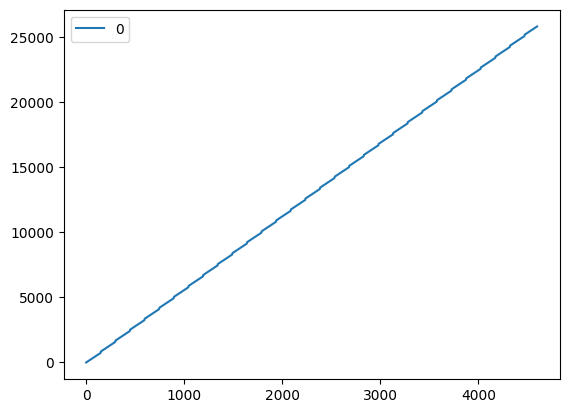

In [ ]:
ornt_fields_dfs['stimtimes'].plot()

###exploring

In [ ]:
for df_name, field in nuro_ornt.items():
  print(f"Dataframe name: {df_name}")
  display(field)
  print('\n')

Dataframe name: sresp


array([[53.48326111, 63.13476181, 62.43212509, ...,  0.86296844,
         1.07298958,  7.5994482 ],
       [20.51850319,  2.37995696,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  9.89747047,
         5.40682411,  0.        ],
       ...,
       [ 0.        ,  0.        ,  4.99041986, ...,  0.        ,
         1.51615846,  2.20970607],
       [16.47986794,  0.        ,  5.06164503, ...,  0.        ,
         0.        ,  0.        ],
       [ 7.97379541,  0.        , 31.22244835, ..., 18.11277962,
         0.        , 24.30965614]])



Dataframe name: istim


array([2.62022653e+00, 4.52593227e+00, 7.18638172e-04, ...,
       2.76552240e+00, 6.66378931e-01, 5.51212615e+00])



Dataframe name: stat


array([{'ypix': array([220, 220, 220, 221, 221, 221, 221, 221, 221, 221, 221, 221, 222,
              222, 222, 222, 222, 222, 222, 222, 222, 223, 223, 223, 223, 223,
              223, 223, 223, 223, 223, 223, 224, 224, 224, 224, 224, 224, 224,
              224, 224, 224, 225, 225, 225, 225, 225, 225, 225, 225, 225, 226,
              226, 226, 226, 226, 226, 226, 226, 226, 227, 227, 227, 227, 227,
              227, 228, 228, 228, 228, 228, 228, 229, 229, 229, 229, 230, 230,
              230], dtype=int32), 'lam': array([ 1.4267471,  1.8092183,  1.9675549,  1.6410617,  4.053359 ,
               5.973709 ,  5.8645153,  6.0527835,  6.558485 ,  6.275843 ,
               6.5751143,  5.493147 ,  4.279305 ,  7.5622654,  8.289282 ,
               9.206155 , 12.00472  , 15.474386 , 18.46614  , 12.823662 ,
               5.026419 ,  2.1919866,  5.442851 ,  8.248459 , 10.014174 ,
              13.324116 , 19.649536 , 25.632708 , 23.764254 , 17.117746 ,
               9.335712 ,  4.4966736,  



Dataframe name: u_spont


array([[-0.00538566,  0.0032806 ,  0.01605133, ...,  0.00480186,
         0.00807864, -0.00388144],
       [-0.00666224, -0.00970621, -0.0024925 , ...,  0.00368227,
         0.00529248, -0.00573754],
       [ 0.00552176, -0.02379645, -0.00693893, ..., -0.00369997,
        -0.00348491, -0.00243357],
       ...,
       [ 0.00432726,  0.01242623, -0.00056416, ...,  0.00615941,
         0.00903255,  0.01029938],
       [-0.01449808,  0.00131063,  0.00281843, ..., -0.00819555,
        -0.01490957,  0.00629974],
       [-0.01226556,  0.00085622, -0.0015534 , ...,  0.00335578,
        -0.00752175, -0.01483561]])



Dataframe name: v_spont


array([[ 1.49614241e+01,  4.86093952e+00,  1.05534826e+00, ...,
         5.60225955e+00, -1.10300152e+01, -3.03369123e-02],
       [ 2.73524264e+01,  3.91597785e+01,  4.44585823e+01, ...,
        -2.77104240e+01, -2.66264674e+01, -2.32746050e+01],
       [-1.16831107e+01, -2.55167975e+01, -2.79624289e+01, ...,
         1.52763446e+01,  2.10893379e+01,  1.11579452e+01],
       ...,
       [ 6.82168941e+00,  5.22166495e+00,  6.16212200e+00, ...,
         2.45967919e+00,  3.49969457e+00, -5.61755328e+00],
       [-7.09355768e+00, -7.42220016e+00, -2.33231340e+00, ...,
        -2.71264652e+00, -9.95263579e+00, -3.52029803e-01],
       [ 8.42146012e-01, -4.91886777e-01, -1.12721290e+00, ...,
        -3.30451690e+00, -3.75487146e+00, -2.19057756e+00]])



Dataframe name: mean_spont


array([160.05658801, 281.09455393, 382.85397754, ...,   3.20862351,
         1.23335275,   1.60142893])



Dataframe name: std_spont


array([ 93.96181161, 226.08771718, 293.6202631 , ...,   4.19377951,
         3.26321229,   2.98750669])



Dataframe name: stimtimes


array([    1,     6,    11, ..., 25826, 25831, 25836])



Dataframe name: frametimes


array([    8119,     9862,    11604, ..., 45053181, 45054925, 45056668])



Dataframe name: camtimes


array([    1892,     1992,     2092, ..., 45055392, 45055492, 45055592])



Dataframe name: run


array([4.9906616 , 0.07576985, 5.252225  , ..., 0.        , 0.        ,
       0.        ], dtype=float32)



Dataframe name: info


'responses of 23589 neurons to 4598 static gratings'



Dataframe name: xyz


array([[ 448.  , 1080.  ,  342.  , ...,  221.  ,  766.  ,  246.  ],
       [  26.6 ,  119.7 ,  200.83, ...,  506.73,   70.49,  166.25],
       [-150.  , -150.  , -150.  , ..., -450.  , -450.  , -450.  ]])

In [ ]:
ornt_fields_dfs.keys()

dict_keys(['sresp', 'istim', 'stat', 'u_spont', 'v_spont', 'mean_spont', 'std_spont', 'stimtimes', 'frametimes', 'camtimes', 'run', 'xyz'])

In [ ]:
ornt_fields_dfs['xyz']

0       1      2
0       448.0   26.60 -150.0
1      1080.0  119.70 -150.0
2       342.0  200.83 -150.0
3        32.0  591.85 -150.0
4       996.0  208.81 -150.0
...       ...     ...    ...
23584   482.0  224.77 -450.0
23585  1122.0  139.65 -450.0
23586   221.0  506.73 -450.0
23587   766.0   70.49 -450.0
23588   246.0  166.25 -450.0

[23589 rows x 3 columns]

<Axes: ylabel='Frequency'>

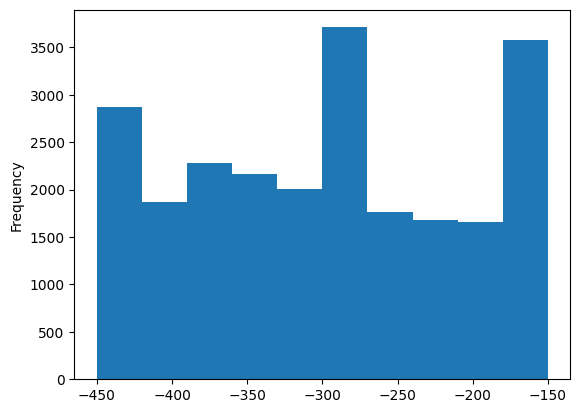

In [ ]:
ornt_fields_dfs['xyz'][2].plot(kind='hist')

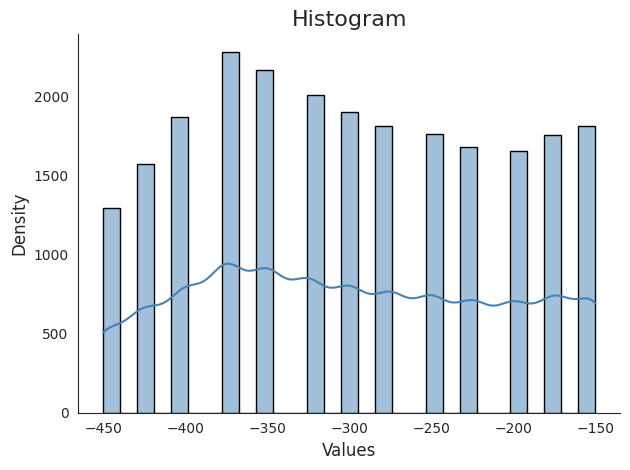

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")
sns.histplot(ornt_fields_dfs['xyz'][2], color='steelblue', edgecolor='black', kde=True)
plt.title("Histogram", fontsize=16)
plt.xlabel("Values", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.despine()
plt.tight_layout()
plt.show()

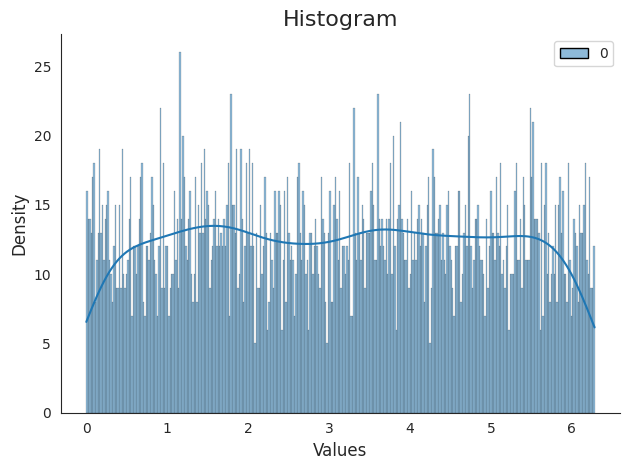

In [ ]:
sns.set_style("white")
sns.histplot(ornt_fields_dfs['istim'], bins=360, color='steelblue', edgecolor='black', kde=True)
plt.title("Histogram", fontsize=16)
plt.xlabel("Values", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.despine()
plt.tight_layout()
plt.show()

In [ ]:
hist, bin_edges = np.histogram(ornt_fields_dfs['istim'], bins=360)

# Print the bin edges and histogram counts
for i in range(len(bin_edges) - 1):
    print(f"Bin {i}: {bin_edges[i]} - {bin_edges[i+1]} - Count: {hist[i]}")

Bin 0: 0.0006091591363192009 - 0.01805859163174949 - Count: 16
Bin 1: 0.01805859163174949 - 0.03550802412717978 - Count: 14
Bin 2: 0.03550802412717978 - 0.05295745662261007 - Count: 14
Bin 3: 0.05295745662261007 - 0.07040688911804036 - Count: 13
Bin 4: 0.07040688911804036 - 0.08785632161347065 - Count: 17
Bin 5: 0.08785632161347065 - 0.10530575410890093 - Count: 18
Bin 6: 0.10530575410890093 - 0.12275518660433121 - Count: 8
Bin 7: 0.12275518660433121 - 0.1402046190997615 - Count: 11
Bin 8: 0.1402046190997615 - 0.1576540515951918 - Count: 13
Bin 9: 0.1576540515951918 - 0.1751034840906221 - Count: 19
Bin 10: 0.1751034840906221 - 0.19255291658605236 - Count: 13
Bin 11: 0.19255291658605236 - 0.21000234908148266 - Count: 15
Bin 12: 0.21000234908148266 - 0.22745178157691295 - Count: 11
Bin 13: 0.22745178157691295 - 0.24490121407234322 - Count: 14
Bin 14: 0.24490121407234322 - 0.2623506465677735 - Count: 15
Bin 15: 0.2623506465677735 - 0.2798000790632038 - Count: 16
Bin 16: 0.2798000790632038

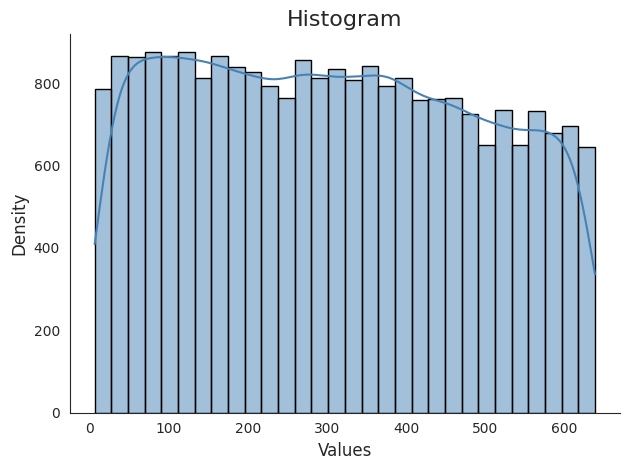

In [ ]:
sns.set_style("white")
sns.histplot(ornt_fields_dfs['xyz'][1], color='steelblue', edgecolor='black', kde=True)
plt.title("Histogram", fontsize=16)
plt.xlabel("Values", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.despine()
plt.tight_layout()
plt.show()

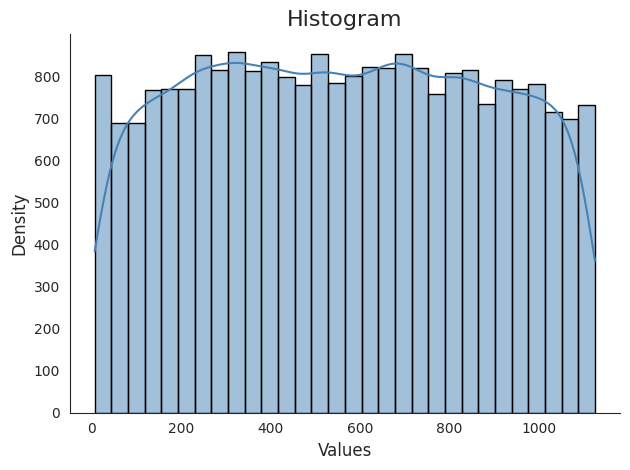

In [ ]:
sns.set_style("white")
sns.histplot(ornt_fields_dfs['xyz'][0], color='steelblue', edgecolor='black', kde=True)
plt.title("Histogram", fontsize=16)
plt.xlabel("Values", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.despine()
plt.tight_layout()
plt.show()

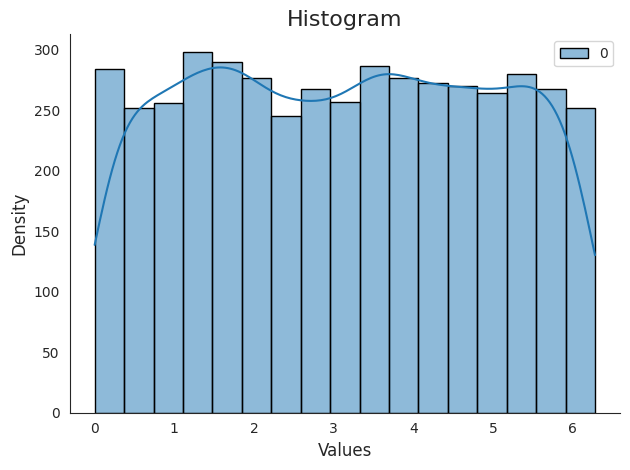

In [ ]:
sns.set_style("white")
sns.histplot(ornt_fields_dfs['istim'], color='steelblue', edgecolor='black', kde=True)
plt.title("Histogram", fontsize=16)
plt.xlabel("Values", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.despine()
plt.tight_layout()
plt.show()

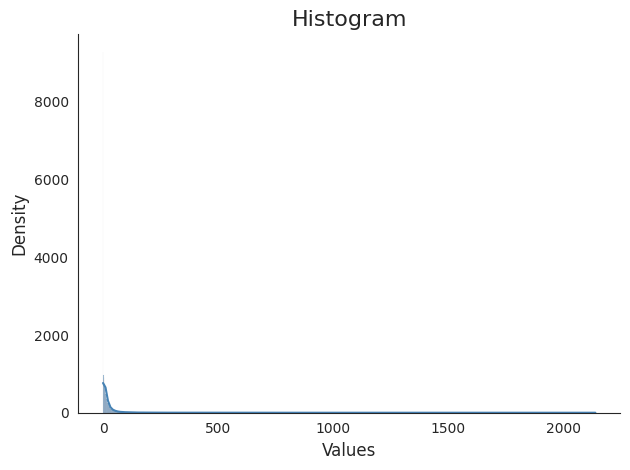

In [ ]:
sns.set_style("white")
sns.histplot(ornt_fields_dfs['sresp'][0], color='steelblue', edgecolor='black', kde=True)
plt.title("Histogram", fontsize=16)
plt.xlabel("Values", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.despine()
plt.tight_layout()
plt.show()

In [ ]:
ornt_fields_dfs['sresp'][0].value_counts()

0.000000     8337
23.483603       2
6.145902        2
6.870285        2
11.180348       2
             ... 
10.147738       1
8.546384        1
52.212940       1
14.891805       1
7.973795        1
Name: 0, Length: 15249, dtype: int64

In [ ]:
ornt_fields_dfs['sresp'][0].sort_values(ascending=False)

92       2140.469482
5310     2023.909546
5289     1792.195190
616      1737.931030
2085     1580.634399
            ...     
17868       0.000000
17867       0.000000
3271        0.000000
13073       0.000000
9380        0.000000
Name: 0, Length: 23589, dtype: float64

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
first_t = ornt_fields_dfs['sresp'][0]

first_t = np.log1p(first_t)

first_t = pd.DataFrame(first_t)

scaler = StandardScaler()

first_t = scaler.fit_transform(first_t)

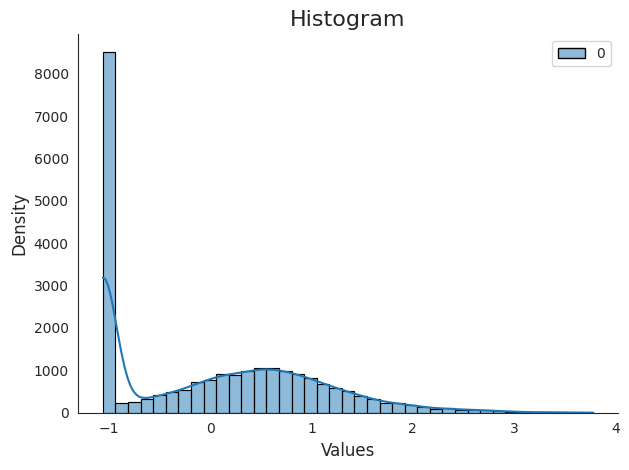

In [ ]:
sns.set_style("white")
sns.histplot(first_t, color='steelblue', edgecolor='black', kde=True)
plt.title("Histogram", fontsize=16)
plt.xlabel("Values", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.despine()
plt.tight_layout()
plt.show()

In [ ]:
first_t

array([[ 1.46437278],
       [ 0.87816212],
       [-1.05840162],
       ...,
       [-1.05840162],
       [ 0.74699495],
       [ 0.32626404]])

In [ ]:
def load_data(data_name, bin_width=1):
  """Load mouse V1 data from Stringer et al. (2019)

  Data from study reported in this preprint:
  https://www.biorxiv.org/content/10.1101/679324v2.abstract

  These data comprise time-averaged responses of ~20,000 neurons
  to ~4,000 stimulus gratings of different orientations, recorded
  through Calcium imaging. The responses have been normalized by
  spontaneous levels of activity and then z-scored over stimuli, so
  expect negative numbers. They have also been binned and averaged
  to each degree of orientation.

  This function returns the relevant data (neural responses and
  stimulus orientations) in a torch.Tensor of data type torch.float32
  in order to match the default data type for nn.Parameters in
  Google Colab.

  This function will actually average responses to stimuli with orientations
  falling within bins specified by the bin_width argument. This helps
  produce individual neural "responses" with smoother and more
  interpretable tuning curves.

  Args:
    bin_width (float): size of stimulus bins over which to average neural
      responses

  Returns:
    resp (torch.Tensor): n_stimuli x n_neurons matrix of neural responses,
        each row contains the responses of each neuron to a given stimulus.
        As mentioned above, neural "response" is actually an average over
        responses to stimuli with similar angles falling within specified bins.
    stimuli: (torch.Tensor): n_stimuli x 1 column vector with orientation
        of each stimulus, in degrees. This is actually the mean orientation
        of all stimuli in each bin.

  """
  with np.load(data_name, allow_pickle=True) as dobj:
    data = dict(**dobj)
  resp = data['resp']
  stimuli = data['stimuli']

  if bin_width > 1:
    # Bin neural responses and stimuli
    bins = np.digitize(stimuli, np.arange(0, 360 + bin_width, bin_width))
    stimuli_binned = np.array([stimuli[bins == i].mean() for i in np.unique(bins)])
    resp_binned = np.array([resp[bins == i, :].mean(0) for i in np.unique(bins)])
  else:
    resp_binned = resp
    stimuli_binned = stimuli

  # Return as torch.Tensor
  resp_tensor = torch.tensor(resp_binned, dtype=torch.float32)
  stimuli_tensor = torch.tensor(stimuli_binned, dtype=torch.float32).unsqueeze(1)  # add singleton dimension to make a column vector

  return resp_tensor, stimuli_tensor

In [ ]:
# Imports
import os
import numpy as np

import torch
from torch import nn
from torch import optim

import matplotlib as mpl
from matplotlib import pyplot as plt

In [ ]:
#fname = '/content/drive/MyDrive/Stringer-spontaneous-Project-(Analysis)/dataset/dataset-files/stringer-orientations/stringer-orientations.npy'
#resp_all, stimuli_all = load_data(fname)  # argument to this function specifies bin width

In [ ]:
sns.set_style("whitegrid")

sns.scatterplot(data, color='steelblue', edgecolor='black')
plt.title("Scatter Plot", fontsize=16)
plt.xlabel("Index", fontsize=12)
plt.ylabel("Data", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

NameError: ignored

###preprocessing

#### istim column:

In [ ]:
ornt_fields_dfs['istim']

0
0     2.620227
1     4.525932
2     0.000719
3     1.899612
4     0.922094
...        ...
4593  5.958334
4594  1.826415
4595  2.765522
4596  0.666379
4597  5.512126

[4598 rows x 1 columns]

In [ ]:
def from_pi_to_degree(pi):

  # Convert to 360 degrees
  degree = (pi * 180) / np.pi

  return degree

In [ ]:
ornt_fields_dfs['istim']['degree'] = ornt_fields_dfs['istim'].apply(lambda pi: from_pi_to_degree(pi))

In [ ]:
ornt_fields_dfs['istim']

0      degree
0     2.620227  150.127922
1     4.525932  259.316818
2     0.000719    0.041175
3     1.899612  108.839726
4     0.922094   52.832121
...        ...         ...
4593  5.958334  341.387366
4594  1.826415  104.645845
4595  2.765522  158.452761
4596  0.666379   38.180700
4597  5.512126  315.821564

[4598 rows x 2 columns]

In [ ]:
ornt_fields_dfs['istim'].columns = ['pi', 'degree']

In [ ]:
ornt_fields_dfs['istim']

pi      degree
0     2.620227  150.127922
1     4.525932  259.316818
2     0.000719    0.041175
3     1.899612  108.839726
4     0.922094   52.832121
...        ...         ...
4593  5.958334  341.387366
4594  1.826415  104.645845
4595  2.765522  158.452761
4596  0.666379   38.180700
4597  5.512126  315.821564

[4598 rows x 2 columns]

#### sresp dataframe:

In [ ]:
ornt_fields_dfs['sresp']

0          1          2           3           4          5     \
0       53.483261  63.134762  62.432125  156.087830  374.028961  63.386662   
1       20.518503   2.379957   0.000000    0.000000    5.017585   2.397176   
2        0.000000   0.000000   0.000000    6.526441    1.136153   0.000000   
3      578.916809  14.064929   0.000000  586.897522   20.846800  91.444481   
4        1.836931   6.834842  12.260544    2.147522    0.000000   0.000000   
...           ...        ...        ...         ...         ...        ...   
23584    0.000000   0.000000   5.905285    2.372391   11.290267   0.000000   
23585    3.518415   4.695301   0.000000    0.000000    0.000000   0.696216   
23586    0.000000   0.000000   4.990420    0.000000    0.000000  13.825993   
23587   16.479868   0.000000   5.061645    0.000000    0.000000   0.000000   
23588    7.973795   0.000000  31.222448    0.000000    0.000000   0.000000   

            6          7         8          9     ...         4588  \
0       0.000000  34.681080  0.499633   2.475683  ...     0.000000   
1       0.000000   0.618409  0.000000   0.000000  ...    69.683777   
2      14.185391   0.000000  0.000000   5.382135  ...     0.000000   
3       0.000000   0.000000  0.000000   0.000000  ...  1033.119507   
4       0.000000   0.000000  0.000000  15.978809  ...    42.948841   
...          ...        ...       ...        ...  ...          ...   
23584   0.000000   0.000000  0.000000   0.000000  ...     0.000000   
23585   2.640064   0.000000  0.000000   1.182349  ...     0.000000   
23586   0.000000  15.988823  0.000000   2.477597  ...     0.000000   
23587   0.000000   2.381921  3.190627   6.714071  ...     0.000000   
23588   0.000000   0.000000  4.019590   6.661022  ...     0.000000   

             4589        4590        4591       4592       4593       4594  \
0        3.900965    1.634272    0.636133   0.000000   0.000000   0.000000   
1       74.929726   10.386744   47.782207   0.000000   0.000000   0.000000   
2        0.000000   28.795988   12.760293   0.000000   0.137050   0.000000   
3      816.178467  169.079025  263.686035  73.718864   0.000000   0.000000   
4        0.509754    9.655540    0.000000   0.501553  15.271520   0.000000   
...           ...         ...         ...        ...        ...        ...   
23584   16.654892    0.121929   11.362716  14.861847   0.000000  13.600766   
23585    1.297922    1.226227    0.226649   0.000000   0.000000   0.000000   
23586    3.292549    0.000000    0.000000   3.953462   5.113644   0.000000   
23587    3.079573    0.000000   15.371961   0.000000   0.000000   0.000000   
23588    0.000000   23.241776    0.000000   0.000000  79.129387   0.000000   

            4595      4596       4597  
0       0.862968  1.072990   7.599448  
1       0.000000  0.000000   0.000000  
2       9.897470  5.406824   0.000000  
3       0.000000  0.000000   0.000000  
4       0.000000  0.000000   0.000000  
...          ...       ...        ...  
23584   0.000000  3.041414   4.356057  
23585   1.413638  0.000000   0.000000  
23586   0.000000  1.516158   2.209706  
23587   0.000000  0.000000   0.000000  
23588  18.112780  0.000000  24.309656  

[23589 rows x 4598 columns]

In [ ]:
ornt_fields_dfs['mean_spont']

0
0      160.056588
1      281.094554
2      382.853978
3      480.990995
4       72.275978
...           ...
23584    6.367591
23585    1.350834
23586    3.208624
23587    1.233353
23588    1.601429

[23589 rows x 1 columns]

In [ ]:
ornt_fields_dfs['std_spont']

0
0       93.961812
1      226.087717
2      293.620263
3      292.324719
4       93.336656
...           ...
23584    7.705494
23585    2.086764
23586    4.193780
23587    3.263212
23588    2.987507

[23589 rows x 1 columns]

In [ ]:
import time
import pandas as pd
import numpy as np

mean_spont = ornt_fields_dfs['mean_spont']
std_spont = ornt_fields_dfs['std_spont']

# Initialize a dictionary to store the durations for each stimulus
stimulus_durations = {}

num_neurons = ornt_fields_dfs['sresp'].shape[0]
batch_size = 1000  # Adjust the batch size according to your preference and memory capacity

for stimulus in range(ornt_fields_dfs['sresp'].shape[1]):
    start_time = time.time()  # Start the timer for each stimulus

    for i in range(0, num_neurons, batch_size):
        batch_start = i
        batch_end = min(i + batch_size, num_neurons)

        ornt_fields_dfs['sresp'].iloc[batch_start:batch_end, stimulus] = ((ornt_fields_dfs['sresp'].iloc[batch_start:batch_end, stimulus] - mean_spont[0].iloc[batch_start:batch_end]) / std_spont[0].iloc[batch_start:batch_end])

    duration = time.time() - start_time  # Calculate the duration for each stimulus
    stimulus_durations[stimulus] = duration  # Store the duration for the current stimulus

    # Print the duration for the current stimulus
    print(f"Stimulus {stimulus}: {duration} seconds")

# Print the duration for each stimulus at the end
print("Duration for each stimulus:")
for stimulus, duration in stimulus_durations.items():
    print(f"Stimulus {stimulus}: {duration} seconds")


Streaming output truncated to the last 5000 lines.
Stimulus 4197: 0.0254976749420166 seconds
Stimulus 4198: 0.0275876522064209 seconds
Stimulus 4199: 0.03309130668640137 seconds
Stimulus 4200: 0.02517223358154297 seconds
Stimulus 4201: 0.02425098419189453 seconds
Stimulus 4202: 0.0255887508392334 seconds
Stimulus 4203: 0.02579522132873535 seconds
Stimulus 4204: 0.024712085723876953 seconds
Stimulus 4205: 0.027034759521484375 seconds
Stimulus 4206: 0.0268399715423584 seconds
Stimulus 4207: 0.037671804428100586 seconds
Stimulus 4208: 0.03434133529663086 seconds
Stimulus 4209: 0.02805924415588379 seconds
Stimulus 4210: 0.028255224227905273 seconds
Stimulus 4211: 0.03368544578552246 seconds
Stimulus 4212: 0.025157690048217773 seconds
Stimulus 4213: 0.027704715728759766 seconds
Stimulus 4214: 0.035201311111450195 seconds
Stimulus 4215: 0.03405570983886719 seconds
Stimulus 4216: 0.024596452713012695 seconds
Stimulus 4217: 0.027792692184448242 seconds
Stimulus 4218: 0.025608301162719727 secon

In [ ]:
import time
import pandas as pd
import numpy as np
from scipy.stats import zscore

stimulus_durations = {}

start_time = time.time()  # Start the timer

# Apply z-score normalization to all columns at once using a vectorized operation
ornt_fields_dfs['sresp'] = ornt_fields_dfs['sresp'].apply(lambda x: power_transformation(x, power=3), axis=1)

duration = time.time() - start_time  # Calculate the duration

# Store the duration for the current stimulus (assuming it's the total duration)
stimulus_durations['All Stimuli'] = duration

# Print the duration
print(f"Total Duration: {duration} seconds")

# Print the duration for each stimulus at the end
print("Duration for each neuron:")
for stimulus, duration in stimulus_durations.items():
    print(f"neuron {stimulus}: {duration} seconds")


Total Duration: 17.520982265472412 seconds
Duration for each neuron:
neuron All Stimuli: 17.520982265472412 seconds


In [ ]:
from scipy.stats import zscore

In [ ]:
import time
import pandas as pd
import numpy as np
from scipy.stats import zscore

stimulus_durations = {}

start_time = time.time()  # Start the timer

# Apply z-score normalization to all columns at once using a vectorized operation
ornt_fields_dfs['sresp'] = ornt_fields_dfs['sresp'].apply(zscore)

duration = time.time() - start_time  # Calculate the duration

# Store the duration for the current stimulus (assuming it's the total duration)
stimulus_durations['All Stimuli'] = duration

# Print the duration
print(f"Total Duration: {duration} seconds")

# Print the duration for each stimulus at the end
print("Duration for each stimulus:")
for stimulus, duration in stimulus_durations.items():
    print(f"Stimulus {stimulus}: {duration} seconds")


Total Duration: 12.007618188858032 seconds
Duration for each stimulus:
Stimulus All Stimuli: 12.007618188858032 seconds


####bininng:

In [ ]:
ornt_fields_dfs['sresp']

0         1         2         3         4         5         6     \
0     -0.023399 -0.018754 -0.016431 -0.027754 -0.025339 -0.018483 -0.029936   
1     -0.023399 -0.018756 -0.016434 -0.027759 -0.025532 -0.018489 -0.029848   
2     -0.023401 -0.018757 -0.016435 -0.027759 -0.025537 -0.018491 -0.029849   
3     -0.023397 -0.018762 -0.016443 -0.027754 -0.025561 -0.018492 -0.029921   
4     -0.023398 -0.018752 -0.016428 -0.027755 -0.025512 -0.018478 -0.029805   
...         ...       ...       ...       ...       ...       ...       ...   
23584 -0.023398 -0.018752 -0.016427 -0.027754 -0.025502 -0.018479 -0.029808   
23585 -0.023395 -0.018740 -0.016428 -0.027754 -0.025510 -0.018475 -0.029785   
23586 -0.023398 -0.018752 -0.016426 -0.027755 -0.025512 -0.018356 -0.029805   
23587 -0.023222 -0.018751 -0.016421 -0.027754 -0.025507 -0.018475 -0.029793   
23588 -0.023380 -0.018751 -0.012914 -0.027754 -0.025508 -0.018476 -0.029796   

           7         8         9     ...      4588      4589      4590  \
0     -0.026179 -0.040034 -0.021755  ... -0.025253 -0.017704 -0.018272   
1     -0.026174 -0.040005 -0.021742  ... -0.025210 -0.017700 -0.018262   
2     -0.026177 -0.040008 -0.021743  ... -0.025225 -0.017702 -0.018262   
3     -0.026198 -0.040030 -0.021754  ... -0.025131 -0.017698 -0.018260   
4     -0.026161 -0.039991 -0.021734  ... -0.025202 -0.017700 -0.018258   
...         ...       ...       ...  ...       ...       ...       ...   
23584 -0.026162 -0.039992 -0.021735  ... -0.025207 -0.017697 -0.018258   
23585 -0.026159 -0.039989 -0.021733  ... -0.025204 -0.017699 -0.018257   
23586 -0.025889 -0.039991 -0.021733  ... -0.025206 -0.017699 -0.018258   
23587 -0.026156 -0.039984 -0.021710  ... -0.025202 -0.017699 -0.018257   
23588 -0.026158 -0.039981 -0.021710  ... -0.025203 -0.017699 -0.017028   

           4591      4592      4593      4594      4595      4596      4597  
0     -0.023258 -0.031879 -0.023524 -0.032508 -0.018210 -0.016643 -0.020076  
1     -0.023249 -0.031848 -0.023494 -0.032484 -0.018136 -0.016617 -0.020069  
2     -0.023251 -0.031851 -0.023497 -0.032486 -0.018139 -0.016619 -0.020070  
3     -0.023248 -0.031856 -0.023519 -0.032504 -0.018200 -0.016640 -0.020077  
4     -0.023248 -0.031833 -0.023478 -0.032472 -0.018099 -0.016604 -0.020064  
...         ...       ...       ...       ...       ...       ...       ...  
23584 -0.023246 -0.031814 -0.023481 -0.032462 -0.018102 -0.016601 -0.020063  
23585 -0.023247 -0.031831 -0.023478 -0.032471 -0.018088 -0.016602 -0.020064  
23586 -0.023248 -0.031828 -0.023475 -0.032472 -0.018099 -0.016600 -0.020063  
23587 -0.023058 -0.031829 -0.023476 -0.032469 -0.018089 -0.016600 -0.020063  
23588 -0.023247 -0.031830  0.148631 -0.032470 -0.013834 -0.016601 -0.018649  

[23589 rows x 4598 columns]

In [ ]:
ornt_fields_dfs['istim']

pi      degree
0     2.620227  150.127922
1     4.525932  259.316818
2     0.000719    0.041175
3     1.899612  108.839726
4     0.922094   52.832121
...        ...         ...
4593  5.958334  341.387366
4594  1.826415  104.645845
4595  2.765522  158.452761
4596  0.666379   38.180700
4597  5.512126  315.821564

[4598 rows x 2 columns]

In [ ]:
ornt_fields_dfs['istim']['degree']

0       150.127922
1       259.316818
2         0.041175
3       108.839726
4        52.832121
           ...    
4593    341.387366
4594    104.645845
4595    158.452761
4596     38.180700
4597    315.821564
Name: degree, Length: 4598, dtype: float64

In [ ]:
# Bin the 'degree' column into 360 bins
bins = pd.cut(ornt_fields_dfs['istim']['degree'], bins=360, labels=False)

ornt_fields_dfs['istim']['assigned_bin'] = bins

ornt_fields_dfs['istim']

pi      degree  assigned_bin
0     2.620227  150.127922           150
1     4.525932  259.316818           259
2     0.000719    0.041175             0
3     1.899612  108.839726           108
4     0.922094   52.832121            52
...        ...         ...           ...
4593  5.958334  341.387366           341
4594  1.826415  104.645845           104
4595  2.765522  158.452761           158
4596  0.666379   38.180700            38
4597  5.512126  315.821564           315

[4598 rows x 3 columns]

####grouping:

In [ ]:
temp = ornt_fields_dfs['sresp'].T
temp[['degree', 'assigned_bin']] = ornt_fields_dfs['istim'][['degree', 'assigned_bin']]
temp['run'] = ornt_fields_dfs['run'][0]
temp

0         1         2         3         4         5         6  \
0    -0.023399 -0.023399 -0.023401 -0.023397 -0.023398  0.652365 -0.023390   
1    -0.018754 -0.018756 -0.018757 -0.018762 -0.018752  1.668356 -0.018751   
2    -0.016431 -0.016434 -0.016435 -0.016443 -0.016428  3.493487 -0.016427   
3    -0.027754 -0.027759 -0.027759 -0.027754 -0.027755 -0.024833 -0.027662   
4    -0.025339 -0.025532 -0.025537 -0.025561 -0.025512  0.308853 -0.025509   
...        ...       ...       ...       ...       ...       ...       ...   
4593 -0.023524 -0.023494 -0.023497 -0.023519 -0.023478 -0.023476 -0.023478   
4594 -0.032508 -0.032484 -0.032486 -0.032504 -0.032472 -0.032469 -0.032470   
4595 -0.018210 -0.018136 -0.018139 -0.018200 -0.018099  0.155107 -0.018093   
4596 -0.016643 -0.016617 -0.016619 -0.016640 -0.016604  0.171672 -0.016602   
4597 -0.020076 -0.020069 -0.020070 -0.020077 -0.020064 -0.019262 -0.020063   

             7         8         9  ...     23582     23583     23584  \
0    -0.023397 -0.023400 -0.023363  ... -0.023117 -0.023382 -0.023398   
1    -0.018752 -0.018756 -0.018751  ... -0.018751 -0.018752 -0.018752   
2    -0.016428 -0.016434 -0.016427  ... -0.016412 -0.016425 -0.016427   
3    -0.027755 -0.027757 -0.027755  ... -0.027754 -0.027755 -0.027754   
4    -0.025511 -0.025420 -0.025513  ... -0.025508 -0.025508 -0.025502   
...        ...       ...       ...  ...       ...       ...       ...   
4593 -0.023479 -0.023495 -0.023480  ... -0.023477 -0.023479 -0.023481   
4594 -0.032472 -0.032485 -0.032473  ... -0.032470 -0.032471 -0.032462   
4595 -0.018095 -0.018138 -0.018100  ... -0.018092 -0.018089 -0.018102   
4596 -0.016603 -0.016618 -0.016604  ... -0.016600 -0.016603 -0.016601   
4597 -0.020064 -0.020069 -0.020064  ... -0.020063 -0.020062 -0.020063   

         23585     23586     23587     23588      degree  assigned_bin  \
0    -0.023395 -0.023398 -0.023222 -0.023380  150.127922           150   
1    -0.018740 -0.018752 -0.018751 -0.018751  259.316818           259   
2    -0.016428 -0.016426 -0.016421 -0.012914    0.041175             0   
3    -0.027754 -0.027755 -0.027754 -0.027754  108.839726           108   
4    -0.025510 -0.025512 -0.025507 -0.025508   52.832121            52   
...        ...       ...       ...       ...         ...           ...   
4593 -0.023478 -0.023475 -0.023476  0.148631  341.387366           341   
4594 -0.032471 -0.032472 -0.032469 -0.032470  104.645845           104   
4595 -0.018088 -0.018099 -0.018089 -0.013834  158.452761           158   
4596 -0.016602 -0.016600 -0.016600 -0.016601   38.180700            38   
4597 -0.020064 -0.020063 -0.020063 -0.018649  315.821564           315   

           run  
0     4.990662  
1     0.075770  
2     5.252225  
3     2.850591  
4     0.003781  
...        ...  
4593  0.000000  
4594  0.000000  
4595  0.000000  
4596  0.000000  
4597  0.000000  

[4598 rows x 23592 columns]

In [ ]:
data_in_360 = temp.groupby(by='assigned_bin').mean()
data_in_360 = pd.concat([data_in_360, ornt_fields_dfs['xyz'].T], axis=0)

In [ ]:
data_in_360

0            1           2           3           4           5  \
0     -0.024381    -0.024302   -0.024307   -0.024371   -0.024262    0.198169   
1     -0.020082    -0.020046   -0.020053   -0.020074   -0.020034    0.997231   
2     -0.022279    -0.022247   -0.022251   -0.022284   -0.022226   -0.021305   
3     -0.021290    -0.021240   -0.021247   -0.021277   -0.021222   -0.010914   
4     -0.018762    -0.018699   -0.018707   -0.018755   -0.018669    0.047354   
..          ...          ...         ...         ...         ...         ...   
358   -0.024200    -0.024030   -0.024048   -0.024178   -0.023942    0.482389   
359   -0.021575    -0.021484   -0.021485   -0.021565   -0.021436    0.470831   
0    448.000000  1080.000000  342.000000   32.000000  996.000000  320.000000   
1     26.600000   119.700000  200.830000  591.850000  208.810000  178.220000   
2   -150.000000  -150.000000 -150.000000 -150.000000 -150.000000 -150.000000   

              6           7           8           9  ...       23581  \
0     -0.024257   -0.024259   -0.024285   -0.024240  ...   -0.024237   
1     -0.020031   -0.020033   -0.020047   -0.020025  ...   -0.019972   
2     -0.022224   -0.022225   -0.022249   -0.022225  ...   -0.022192   
3     -0.021218   -0.021221   -0.021243   -0.021222  ...   -0.021129   
4     -0.018663   -0.018666   -0.018688   -0.018668  ...   -0.018658   
..          ...         ...         ...         ...  ...         ...   
358   -0.023930   -0.023935   -0.023997   -0.023948  ...   -0.023924   
359   -0.021429   -0.021434   -0.021465   -0.021436  ...   -0.021404   
0    950.000000  766.000000  824.000000  294.000000  ...  452.000000   
1     54.530000  133.000000  281.960000  381.710000  ...  382.375000   
2   -150.000000 -150.000000 -150.000000 -150.000000  ... -450.000000   

           23582       23583       23584        23585       23586       23587  \
0      -0.024241   -0.024255   -0.024261    -0.024250   -0.024255   -0.024250   
1      -0.020017   -0.020021   -0.020021    -0.020021   -0.020031   -0.020021   
2      -0.022137   -0.022216   -0.022218    -0.022218   -0.022225   -0.022212   
3      -0.021170   -0.021207   -0.021213    -0.021216   -0.021219   -0.021204   
4      -0.018650   -0.018662   -0.018669    -0.018664   -0.018660   -0.018653   
..           ...         ...         ...          ...         ...         ...   
358    -0.023904   -0.023925   -0.023942    -0.023891   -0.023918   -0.023910   
359    -0.021322   -0.021425   -0.021441    -0.021429   -0.021432   -0.021422   
0    1046.000000  486.000000  482.000000  1122.000000  221.000000  766.000000   
1     363.755000   15.960000  224.770000   139.650000  506.730000   70.490000   
2    -450.000000 -450.000000 -450.000000  -450.000000 -450.000000 -450.000000   

          23588      degree        run  
0      0.060047    0.487468  15.916495  
1     -0.017024    1.566261  13.937540  
2      0.007348    2.527949  15.601323  
3      0.058084    3.600979  22.240685  
4     -0.014237    4.609790  11.492642  
..          ...         ...        ...  
358    0.004589  358.627039  14.869432  
359   -0.010735  359.279351   8.339144  
0    246.000000         NaN        NaN  
1    166.250000         NaN        NaN  
2   -450.000000         NaN        NaN  

[363 rows x 23591 columns]

#### vs

In [ ]:
# @title Helper Functions

def load_data(data_name, bin_width=1):
  """Load mouse V1 data from Stringer et al. (2019)

  Data from study reported in this preprint:
  https://www.biorxiv.org/content/10.1101/679324v2.abstract

  These data comprise time-averaged responses of ~20,000 neurons
  to ~4,000 stimulus gratings of different orientations, recorded
  through Calcium imaging. The responses have been normalized by
  spontaneous levels of activity and then z-scored over stimuli, so
  expect negative numbers. They have also been binned and averaged
  to each degree of orientation.

  This function returns the relevant data (neural responses and
  stimulus orientations) in a torch.Tensor of data type torch.float32
  in order to match the default data type for nn.Parameters in
  Google Colab.

  This function will actually average responses to stimuli with orientations
  falling within bins specified by the bin_width argument. This helps
  produce individual neural "responses" with smoother and more
  interpretable tuning curves.

  Args:
    bin_width (float): size of stimulus bins over which to average neural
      responses

  Returns:
    resp (torch.Tensor): n_stimuli x n_neurons matrix of neural responses,
        each row contains the responses of each neuron to a given stimulus.
        As mentioned above, neural "response" is actually an average over
        responses to stimuli with similar angles falling within specified bins.
    stimuli: (torch.Tensor): n_stimuli x 1 column vector with orientation
        of each stimulus, in degrees. This is actually the mean orientation
        of all stimuli in each bin.

  """
  with np.load(data_name) as dobj:
    data = dict(**dobj)
  resp = data['resp']
  stimuli = data['stimuli']

  if bin_width > 1:
    # Bin neural responses and stimuli
    bins = np.digitize(stimuli, np.arange(0, 360 + bin_width, bin_width))
    stimuli_binned = np.array([stimuli[bins == i].mean() for i in np.unique(bins)])
    resp_binned = np.array([resp[bins == i, :].mean(0) for i in np.unique(bins)])
  else:
    resp_binned = resp
    stimuli_binned = stimuli

  # Return as torch.Tensor
  resp_tensor = torch.tensor(resp_binned, dtype=torch.float32)
  stimuli_tensor = torch.tensor(stimuli_binned, dtype=torch.float32).unsqueeze(1)  # add singleton dimension to make a column vector

  return resp_tensor, stimuli_tensor


def get_data(n_stim, train_data, train_labels):
  """ Return n_stim randomly drawn stimuli/resp pairs

  Args:
    n_stim (scalar): number of stimuli to draw
    resp (torch.Tensor):
    train_data (torch.Tensor): n_train x n_neurons tensor with neural
      responses to train on
    train_labels (torch.Tensor): n_train x 1 tensor with orientations of the
      stimuli corresponding to each row of train_data, in radians

  Returns:
    (torch.Tensor, torch.Tensor): n_stim x n_neurons tensor of neural responses and n_stim x 1 of orientations respectively
  """
  n_stimuli = train_labels.shape[0]
  istim = np.random.choice(n_stimuli, n_stim)
  r = train_data[istim]  # neural responses to this stimulus
  ori = train_labels[istim]  # true stimulus orientation

  return r, ori

In [ ]:
# Imports
import os
import numpy as np

import torch
from torch import nn
from torch import optim

import matplotlib as mpl
from matplotlib import pyplot as plt

In [ ]:
# @title Data retrieval and loading
import hashlib
import requests

fname = "W3D4_stringer_oribinned1.npz"
url = "https://osf.io/683xc/download"
expected_md5 = "436599dfd8ebe6019f066c38aed20580"

if not os.path.isfile(fname):
  try:
    r = requests.get(url)
  except requests.ConnectionError:
    print("!!! Failed to download data !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Failed to download data !!!")
    elif hashlib.md5(r.content).hexdigest() != expected_md5:
      print("!!! Data download appears corrupted !!!")
    else:
      with open(fname, "wb") as fid:
        fid.write(r.content)

In [ ]:
str_ornt = np.load("W3D4_stringer_oribinned1.npz")

In [ ]:
str_ornt = dict(str_ornt)
str_ornt.keys()

dict_keys(['resp', 'stimuli'])

In [ ]:
import pandas as pd




str_ornt['resp'] = pd.DataFrame(str_ornt['resp'])

str_ornt['resp']

0         1         2         3         4         5         6      \
0    0.081511 -0.295212 -0.070124 -0.256350 -0.116704 -0.354239  0.135497   
1   -0.022580  0.079826 -0.113092 -0.241534 -0.147463 -0.262117  0.174613   
2    0.166795  0.003401 -0.150187 -0.311696 -0.143478 -0.564415 -0.070871   
3   -0.267940 -0.246730  0.324548  0.135012 -0.165740 -0.462956  0.275610   
4    0.171392  0.139935  0.103104 -0.040965 -0.175831 -0.446837  0.651631   
..        ...       ...       ...       ...       ...       ...       ...   
355 -0.160339 -0.006505 -0.164345  0.130471 -0.198698 -0.183982  0.649991   
356  0.311893 -0.311065 -0.080203 -0.324561  0.292642 -0.087419  0.456332   
357  0.205273 -0.289489  0.057597 -0.282113 -0.137799 -0.056960  0.217310   
358 -0.254470 -0.283288 -0.206736 -0.233238 -0.126862 -0.158632  0.939139   
359 -0.226907 -0.105001  0.000342 -0.312318 -0.090306 -0.322007  0.595775   

        7         8         9      ...     23579     23580     23581  \
0   -0.062617  0.192585  0.338595  ... -0.402639  0.398641  0.030784   
1   -0.129009  0.149832  0.303339  ... -0.160880 -0.065606  0.741946   
2   -0.061659 -0.226263  0.298607  ...  0.074645  0.403184  0.467930   
3   -0.009245 -0.138073 -0.015134  ... -0.068995 -0.020899  0.300084   
4    0.098164  0.440685  0.117800  ... -0.361457 -0.052336  0.143753   
..        ...       ...       ...  ...       ...       ...       ...   
355 -0.134394 -0.363348  0.174090  ... -0.450969  0.181205 -0.073444   
356 -0.047693  0.317674  0.280313  ... -0.202561  0.139582 -0.342042   
357 -0.057762  0.175712  0.501783  ... -0.240979 -0.330254 -0.069285   
358  0.488602 -0.117472  0.006437  ... -0.183473  0.176081  0.383005   
359 -0.089568 -0.281795  0.146362  ... -0.291643 -0.261063 -0.202409   

        23582     23583     23584     23585     23586     23587     23588  
0   -0.201240  0.181333 -0.091789  0.116344  0.291998 -0.214352  0.890155  
1   -0.132571  0.667425  0.166336  0.407703 -0.015115  0.052087  0.200429  
2    0.004106  0.367988 -0.008365  0.259237 -0.393573  0.209222  0.555247  
3   -0.173312  0.712163  0.341626 -0.076955  0.292723 -0.051589  0.651403  
4   -0.235148  0.051809 -0.132280 -0.343840 -0.260048  0.029062  0.295060  
..        ...       ...       ...       ...       ...       ...       ...  
355 -0.132235  0.989667 -0.111921  0.315661 -0.435008  0.056090  0.738690  
356 -0.451762  0.282826 -0.207922  0.029221 -0.040031 -0.098059  0.614925  
357 -0.439860 -0.149309  0.274697 -0.103227 -0.426593 -0.307542  1.147950  
358 -0.380409  0.381012  0.192879  0.408218 -0.139079 -0.101160  0.618939  
359  0.018495  0.114187 -0.562510 -0.316649 -0.204135 -0.177901 -0.134525  

[360 rows x 23589 columns]

In [ ]:
str_ornt['resp'][0].iloc[0] in data_in_360.iloc[0]

False

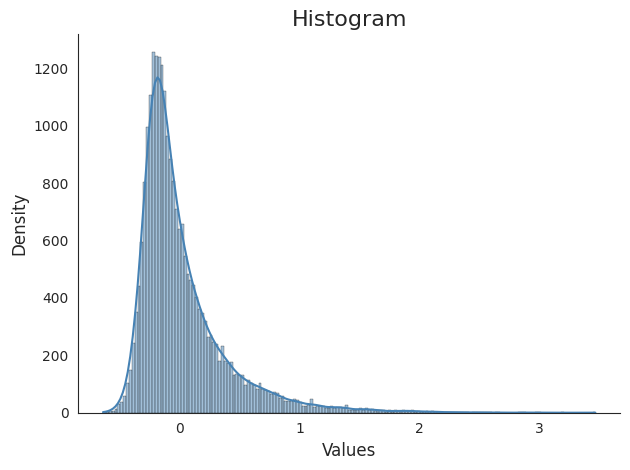

In [ ]:
sns.set_style("white")
sns.histplot(str_ornt['resp'].iloc[0], color='steelblue', edgecolor='black', kde=True)
plt.title("Histogram", fontsize=16)
plt.xlabel("Values", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.despine()
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set_style("white")
sns.histplot(data_in_360.iloc[0], color='steelblue', edgecolor='black', kde=True)
plt.title("Histogram", fontsize=16)
plt.xlabel("Values", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.despine()
plt.tight_layout()
plt.show()

NameError: ignored

####saving cleaned data:

In [ ]:
data_in_360.to_csv('/content/drive/MyDrive/Stringer-spontaneous-Project-(Analysis)/dataset/dataset-files/stringer-orientations/orientation-data-cleaned_neuron_normalized.csv')

NameError: ignored

###EAD:

####importing cleaned data:

In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
ornt = pd.read_csv('/content/drive/MyDrive/Stringer-spontaneous-Project-(Analysis)/dataset/dataset-files/stringer-orientations/orientation-data-cleaned.csv', index_col=False)

In [ ]:
ornt = ornt.drop('Unnamed: 0', axis=1)
ornt

0            1           2           3           4           5  \
0     -0.524084    -0.422406   -0.434198   -0.517501   -0.304082    1.321716   
1     -0.490164    -0.374765   -0.413133   -0.475651   -0.302903    2.551023   
2     -0.480400    -0.393381   -0.419157   -0.486385   -0.312032   -0.100422   
3     -0.486658    -0.388131   -0.391207   -0.436392   -0.296117    0.986444   
4     -0.517005    -0.401151   -0.430815   -0.492796   -0.306747    1.039882   
..          ...          ...         ...         ...         ...         ...   
358   -0.598039    -0.469116   -0.491440   -0.578607   -0.335197    4.018864   
359   -0.544891    -0.419782   -0.435189   -0.534037   -0.296872    2.409672   
360  448.000000  1080.000000  342.000000   32.000000  996.000000  320.000000   
361   26.600000   119.700000  200.830000  591.850000  208.810000  178.220000   
362 -150.000000  -150.000000 -150.000000 -150.000000 -150.000000 -150.000000   

              6           7           8           9  ...       23581  \
0     -0.265232   -0.290475   -0.359043   -0.235711  ...   -0.157381   
1     -0.261265   -0.294822   -0.347697   -0.244089  ...   -0.046227   
2     -0.284580   -0.300564   -0.403820   -0.261159  ...   -0.100813   
3     -0.245824   -0.278914   -0.369421   -0.267381  ...   -0.137566   
4     -0.238154   -0.282521   -0.329628   -0.275438  ...   -0.133857   
..          ...         ...         ...         ...  ...         ...   
358   -0.237379   -0.315001   -0.439188   -0.312785  ...   -0.153582   
359   -0.234060   -0.273613   -0.396815   -0.271127  ...   -0.156755   
360  950.000000  766.000000  824.000000  294.000000  ...  452.000000   
361   54.530000  133.000000  281.960000  381.710000  ...  382.375000   
362 -150.000000 -150.000000 -150.000000 -150.000000  ... -450.000000   

           23582       23583       23584        23585       23586       23587  \
0      -0.108041   -0.176854   -0.251685    -0.177233   -0.184964   -0.140932   
1      -0.068034   -0.116202   -0.203119    -0.107704   -0.225336   -0.103338   
2      -0.078687   -0.166296   -0.198953    -0.170230   -0.284048   -0.105480   
3      -0.053585   -0.125649   -0.207721    -0.227033   -0.160286   -0.113684   
4      -0.117552   -0.194262   -0.251295    -0.232786   -0.209193   -0.117449   
..           ...         ...         ...          ...         ...         ...   
358    -0.161846   -0.187220   -0.194670    -0.078086   -0.180737   -0.124194   
359     0.052043   -0.140677   -0.319226    -0.224323   -0.229742   -0.107480   
360  1046.000000  486.000000  482.000000  1122.000000  221.000000  766.000000   
361   363.755000   15.960000  224.770000   139.650000  506.730000   70.490000   
362  -450.000000 -450.000000 -450.000000  -450.000000 -450.000000 -450.000000   

          23588      degree        run  
0      1.356835    0.487468  15.916495  
1      0.630849    1.566261  13.937540  
2      1.116437    2.527949  15.601323  
3      1.036344    3.600979  22.240685  
4      0.728786    4.609790  11.492642  
..          ...         ...        ...  
358    0.677440  358.627039  14.869432  
359    0.898364  359.279351   8.339144  
360  246.000000         NaN        NaN  
361  166.250000         NaN        NaN  
362 -450.000000         NaN        NaN  

[363 rows x 23591 columns]

####3d reconstruction

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(ornt_fields_dfs['xyz'].T.isna())

NameError: ignored

<Figure size 1000x1000 with 0 Axes>

<Axes: >

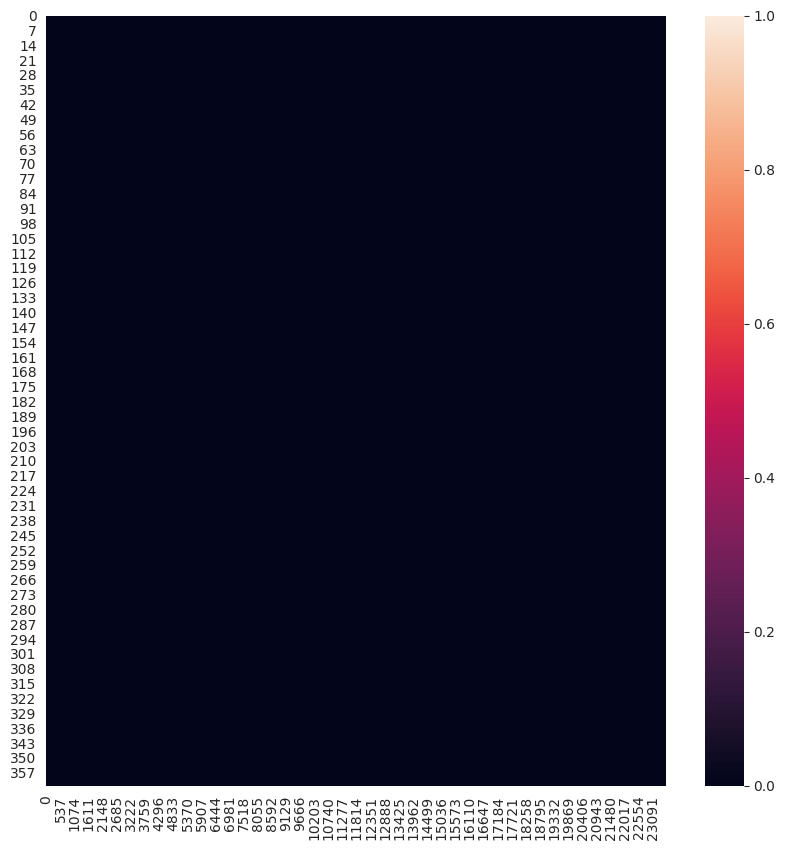

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(ornt.isna())

In [ ]:
import plotly.graph_objects as go
# Assuming the 3D coordinates are stored in `x`, `y`, and `z` arrays
fig = go.Figure(data=[go.Scatter3d(
    x = ornt.iloc[-3, :-2],
    y = ornt.iloc[-2, :-2],
    z = ornt.iloc[-1, :-2],
    mode='markers',
    marker=dict(
        size=5,
        color='blue',
        opacity=0.8
    )
)])

fig.update_layout(
    scene=dict(
        xaxis=dict(title='X'),
        yaxis=dict(title='Y'),
        zaxis=dict(title='Z')
    ),
    width=800,
    height=600
)

fig.show()


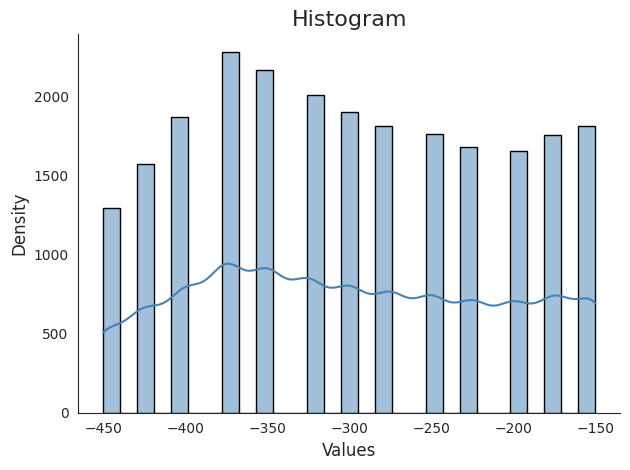

In [ ]:
sns.set_style("white")
sns.histplot(ornt.iloc[-1, :-2], color='steelblue', edgecolor='black', kde=True)
plt.title("Histogram", fontsize=16)
plt.xlabel("Values", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.despine()
plt.tight_layout()
plt.show()

Bin Edges: [-450.         -439.65517241 -429.31034483 -418.96551724 -408.62068966
 -398.27586207 -387.93103448 -377.5862069  -367.24137931 -356.89655172
 -346.55172414 -336.20689655 -325.86206897 -315.51724138 -305.17241379
 -294.82758621 -284.48275862 -274.13793103 -263.79310345 -253.44827586
 -243.10344828 -232.75862069 -222.4137931  -212.06896552 -201.72413793
 -191.37931034 -181.03448276 -170.68965517 -160.34482759 -150.        ]


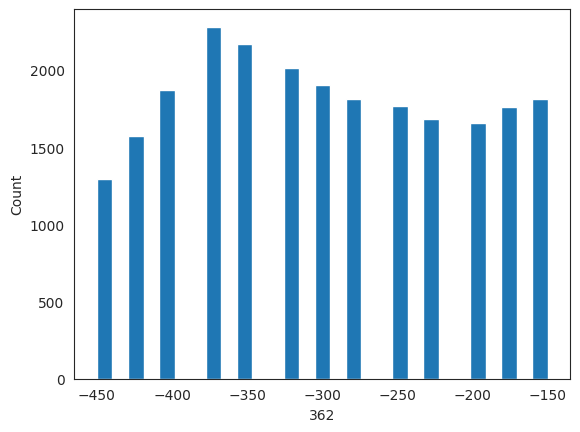

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a histogram plot using sns.histplot()
hist = sns.histplot(ornt.iloc[-1, :-2])

# Get the histogram values and bin edges
values, edges, _ = plt.hist(ornt.iloc[-1, :-2], bins='auto')

# Print the bin edges
print("Bin Edges:", edges)

# Show the plot
plt.show()

In [ ]:
stratasys = pd.cut(ornt.iloc[-1, :-2], bins=13, labels=False)

import plotly.graph_objects as go

# Assuming the 3D coordinates are stored in `x`, `y`, and `z` arrays
fig = go.Figure(data=[go.Scatter3d(
    x=ornt.iloc[-3, :-2],
    y=ornt.iloc[-2, :-2],
    z=ornt.iloc[-1, :-2],
    mode='markers',
    marker=dict(
        size=5,
        color=stratasys,  # Use a categorical variable for color
        colorscale='YlGnBu',  # Set a different colorscale
        cmin=0,  # Set the minimum value for the color scale
        cmax=13,  # Set the maximum value for the color scale
        opacity=0.8
    ),
    hovertemplate='<b>X:</b> %{x}<br><b>Y:</b> %{y}<br><b>Z:</b> %{z}<extra></extra>'
)])

fig.update_layout(
    scene=dict(
        xaxis=dict(title='X'),
        yaxis=dict(title='Y'),
        zaxis=dict(title='Z')
    ),
    width=800,
    height=600
)

fig.show()


In [ ]:
import plotly.graph_objects as go

# Assuming the 3D coordinates are stored in `x`, `y`, and `z` arrays
fig = go.Figure(data=[go.Scatter3d(
    x=ornt.iloc[-3, :-2],
    y=ornt.iloc[-2, :-2],
    z=ornt.iloc[-1, :-2],
    mode='markers',
    marker=dict(
        size=5,
        color=ornt.iloc[270, :-2],  # Use a categorical variable for color
        colorscale='RdBu',  # Set a different colorscale
        opacity=0.8
    ),
    hovertemplate='<b>X:</b> %{x}<br><b>Y:</b> %{y}<br><b>Z:</b> %{z}<extra></extra>'
)])

fig.update_layout(
    scene=dict(
        xaxis=dict(title='X'),
        yaxis=dict(title='Y'),
        zaxis=dict(title='Z')
    ),
    width=800,
    height=600
)

fig.show()

In [ ]:
!pip install mayavi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 27.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.3/229.3 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.9/268.9 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 55.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 70.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 56.9 MB/s eta 0:00:00
  Using cached vtk-9.2.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (79.3 MB)
  Created wheel for mayavi: filename=mayavi-4.8.1-cp310-cp310-linux_x86_64.whl size=16167218 sha256=5a9cccff9c7bad784f93aefefacde1aead131b6a1179db14b329032035a6e002
  Stored in directory: /root/.cache/pip/wheels/c2/6b/23/49aa8ae5063a76fbc35ce90e74f8361cddb9d3a86d5a41ec0a
Successfully built 

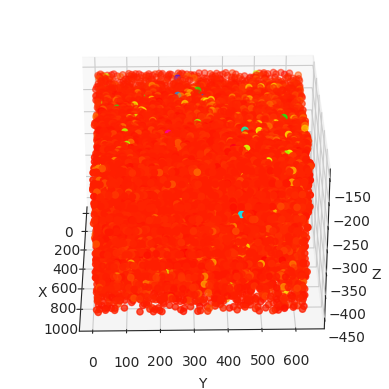

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# Assuming you have a list of 360 hue values called `hue_values`
ornt_resp = ornt.iloc[:-3, :-2]
ornt_loc = ornt.iloc[-3:, :-2]

# Create a figure and axes for the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create an empty scatter plot
scatter = ax.scatter(ornt_loc.iloc[0].values, ornt_loc.iloc[1].values, ornt_loc.iloc[2].values, c=ornt_resp.iloc[0], cmap='hsv')

# Set labels for the axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Initialize the animation function
def update_frame(frame):
    hue_values = ornt_resp.iloc[frame]
    scatter.set_array(hue_values)

    # Change the point of view
    ax.view_init(elev=30, azim=frame)  # Modify the elevation (elev) and azimuth (azim) angles

    return scatter

# Create the animation
animation = FuncAnimation(fig, update_frame, frames=len(ornt_resp), interval=200)

# Save the animation as a video
animation.save('3d_animation.mp4', writer='ffmpeg')

# Show the plot
plt.show()

#### 2d visuals:

In [ ]:
ornt

0            1           2           3           4           5  \
0     -0.524084    -0.422406   -0.434198   -0.517501   -0.304082    1.321716   
1     -0.490164    -0.374765   -0.413133   -0.475651   -0.302903    2.551023   
2     -0.480400    -0.393381   -0.419157   -0.486385   -0.312032   -0.100422   
3     -0.486658    -0.388131   -0.391207   -0.436392   -0.296117    0.986444   
4     -0.517005    -0.401151   -0.430815   -0.492796   -0.306747    1.039882   
..          ...          ...         ...         ...         ...         ...   
358   -0.598039    -0.469116   -0.491440   -0.578607   -0.335197    4.018864   
359   -0.544891    -0.419782   -0.435189   -0.534037   -0.296872    2.409672   
360  448.000000  1080.000000  342.000000   32.000000  996.000000  320.000000   
361   26.600000   119.700000  200.830000  591.850000  208.810000  178.220000   
362 -150.000000  -150.000000 -150.000000 -150.000000 -150.000000 -150.000000   

              6           7           8           9  ...       23581  \
0     -0.265232   -0.290475   -0.359043   -0.235711  ...   -0.157381   
1     -0.261265   -0.294822   -0.347697   -0.244089  ...   -0.046227   
2     -0.284580   -0.300564   -0.403820   -0.261159  ...   -0.100813   
3     -0.245824   -0.278914   -0.369421   -0.267381  ...   -0.137566   
4     -0.238154   -0.282521   -0.329628   -0.275438  ...   -0.133857   
..          ...         ...         ...         ...  ...         ...   
358   -0.237379   -0.315001   -0.439188   -0.312785  ...   -0.153582   
359   -0.234060   -0.273613   -0.396815   -0.271127  ...   -0.156755   
360  950.000000  766.000000  824.000000  294.000000  ...  452.000000   
361   54.530000  133.000000  281.960000  381.710000  ...  382.375000   
362 -150.000000 -150.000000 -150.000000 -150.000000  ... -450.000000   

           23582       23583       23584        23585       23586       23587  \
0      -0.108041   -0.176854   -0.251685    -0.177233   -0.184964   -0.140932   
1      -0.068034   -0.116202   -0.203119    -0.107704   -0.225336   -0.103338   
2      -0.078687   -0.166296   -0.198953    -0.170230   -0.284048   -0.105480   
3      -0.053585   -0.125649   -0.207721    -0.227033   -0.160286   -0.113684   
4      -0.117552   -0.194262   -0.251295    -0.232786   -0.209193   -0.117449   
..           ...         ...         ...          ...         ...         ...   
358    -0.161846   -0.187220   -0.194670    -0.078086   -0.180737   -0.124194   
359     0.052043   -0.140677   -0.319226    -0.224323   -0.229742   -0.107480   
360  1046.000000  486.000000  482.000000  1122.000000  221.000000  766.000000   
361   363.755000   15.960000  224.770000   139.650000  506.730000   70.490000   
362  -450.000000 -450.000000 -450.000000  -450.000000 -450.000000 -450.000000   

          23588      degree        run  
0      1.356835    0.487468  15.916495  
1      0.630849    1.566261  13.937540  
2      1.116437    2.527949  15.601323  
3      1.036344    3.600979  22.240685  
4      0.728786    4.609790  11.492642  
..          ...         ...        ...  
358    0.677440  358.627039  14.869432  
359    0.898364  359.279351   8.339144  
360  246.000000         NaN        NaN  
361  166.250000         NaN        NaN  
362 -450.000000         NaN        NaN  

[363 rows x 23591 columns]

In [ ]:
def calc_mean(row):
  mean = row.mean()
  return mean

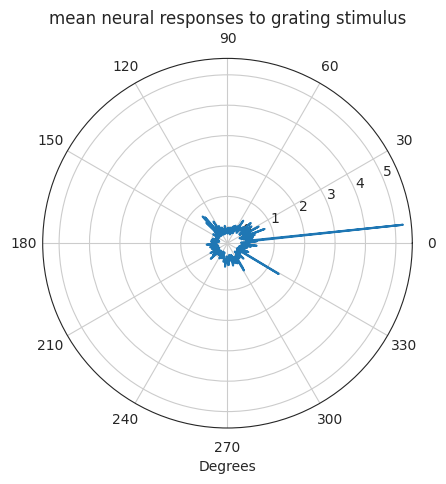

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a list of 360 elements called `data`
data = range(360)

# Convert the data to radians
angles = np.deg2rad(np.arange(0, 360, 1))

# Create a polar plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')

mean = ornt.iloc[:-3, :-2].apply(calc_mean, axis=1)

# Plot the data on the circular plane
ax.plot(angles, ornt.iloc[:-3, 2825])

# Set the tick labels to show degrees
ax.set_xticks(np.linspace(0, 2 * np.pi, 12, endpoint=False))
ax.set_xticklabels(np.arange(0, 360, 30))

# Set the title and labels
ax.set_title('mean neural responses to grating stimulus')
ax.set_xlabel('Degrees')
# Show the plot
plt.show()


In [ ]:
min_degree = mean.min()
x = mean.values
np.where(x == min_degree)[0][0]

16

In [ ]:
def calc_std(row):
  std = row.std()
  return std

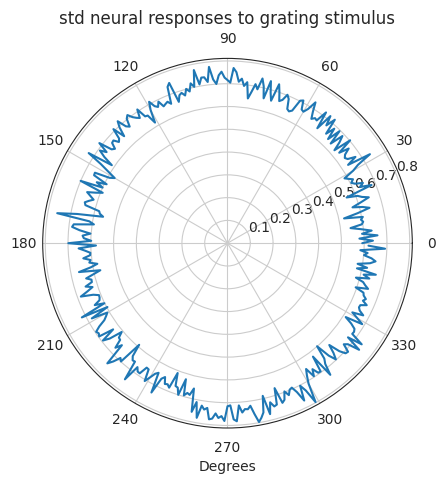

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a list of 360 elements called `data`
data = range(360)

# Convert the data to radians
angles = np.deg2rad(np.arange(0, 360, 1))

# Create a polar plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')

std = ornt.iloc[:-3, :-2].apply(calc_std, axis=1)

# Plot the data on the circular plane
ax.plot(angles, std)

# Set the tick labels to show degrees
ax.set_xticks(np.linspace(0, 2 * np.pi, 12, endpoint=False))
ax.set_xticklabels(np.arange(0, 360, 30))

# Set the title and labels
ax.set_title('std neural responses to grating stimulus')
ax.set_xlabel('Degrees')


# Show the plot
plt.show()


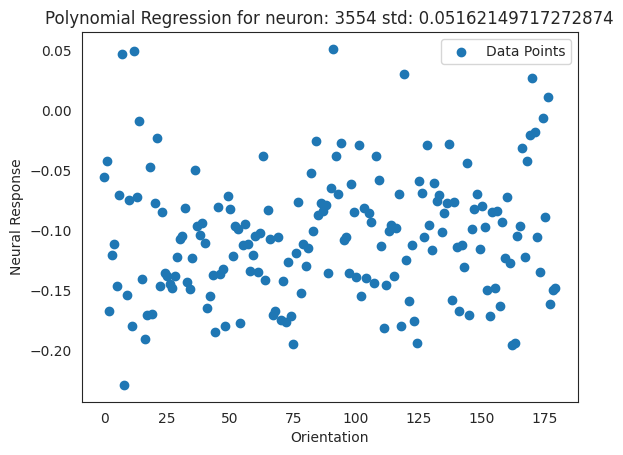

In [ ]:
col_index = 3554
mirror = mirroring(col_index)
plt.scatter(range(len(mirror)), mirror, label='Data Points')
plt.xlabel('Orientation')
plt.ylabel('Neural Response')
plt.title('Polynomial Regression for neuron: ' + str(col_index) + ' std: ' + str(np.std(mirror)))
plt.legend()


In [ ]:
s = ornt.iloc[:-3, col_index]
m = pd.Series(mirror)

In [ ]:
m.quantile(0.75)  - m.quantile(0.25)

0.06592320528437853

In [ ]:
mirror

[-0.05621481901075845,
 -0.043014595039325,
 -0.16747452807565155,
 -0.12084361401970109,
 -0.11169094290095385,
 -0.1464952492664543,
 -0.071345529168484,
 0.046786833417946455,
 -0.22926264049966227,
 -0.15399168569636373,
 -0.0747627414818896,
 -0.18024244888382046,
 0.049231231212845554,
 -0.07279007550095384,
 -0.008978106951856149,
 -0.14071948874146106,
 -0.19096216115363715,
 -0.17091774329641915,
 -0.0477372610362397,
 -0.16980707847576543,
 -0.07798989544421675,
 -0.023520687735836494,
 -0.14655399867178398,
 -0.08535349520955929,
 -0.1358347986800579,
 -0.13848824350458339,
 -0.1455031438094549,
 -0.14815804090696136,
 -0.1383264221817619,
 -0.12281511146890704,
 -0.10794381287812654,
 -0.10552761345218625,
 -0.0816935166296293,
 -0.1437317725800264,
 -0.1493703727423873,
 -0.12338111756552844,
 -0.05033907190456475,
 -0.09680543119628704,
 -0.10431071381962105,
 -0.09447070097777449,
 -0.11098164674935605,
 -0.16555831938690435,
 -0.1554882372102464,
 -0.13803267629155214,


####neuron selectivity:

In [ ]:
ornt

0            1           2           3           4           5  \
0     -0.524084    -0.422406   -0.434198   -0.517501   -0.304082    1.321716   
1     -0.490164    -0.374765   -0.413133   -0.475651   -0.302903    2.551023   
2     -0.480400    -0.393381   -0.419157   -0.486385   -0.312032   -0.100422   
3     -0.486658    -0.388131   -0.391207   -0.436392   -0.296117    0.986444   
4     -0.517005    -0.401151   -0.430815   -0.492796   -0.306747    1.039882   
..          ...          ...         ...         ...         ...         ...   
358   -0.598039    -0.469116   -0.491440   -0.578607   -0.335197    4.018864   
359   -0.544891    -0.419782   -0.435189   -0.534037   -0.296872    2.409672   
360  448.000000  1080.000000  342.000000   32.000000  996.000000  320.000000   
361   26.600000   119.700000  200.830000  591.850000  208.810000  178.220000   
362 -150.000000  -150.000000 -150.000000 -150.000000 -150.000000 -150.000000   

              6           7           8           9  ...       23581  \
0     -0.265232   -0.290475   -0.359043   -0.235711  ...   -0.157381   
1     -0.261265   -0.294822   -0.347697   -0.244089  ...   -0.046227   
2     -0.284580   -0.300564   -0.403820   -0.261159  ...   -0.100813   
3     -0.245824   -0.278914   -0.369421   -0.267381  ...   -0.137566   
4     -0.238154   -0.282521   -0.329628   -0.275438  ...   -0.133857   
..          ...         ...         ...         ...  ...         ...   
358   -0.237379   -0.315001   -0.439188   -0.312785  ...   -0.153582   
359   -0.234060   -0.273613   -0.396815   -0.271127  ...   -0.156755   
360  950.000000  766.000000  824.000000  294.000000  ...  452.000000   
361   54.530000  133.000000  281.960000  381.710000  ...  382.375000   
362 -150.000000 -150.000000 -150.000000 -150.000000  ... -450.000000   

           23582       23583       23584        23585       23586       23587  \
0      -0.108041   -0.176854   -0.251685    -0.177233   -0.184964   -0.140932   
1      -0.068034   -0.116202   -0.203119    -0.107704   -0.225336   -0.103338   
2      -0.078687   -0.166296   -0.198953    -0.170230   -0.284048   -0.105480   
3      -0.053585   -0.125649   -0.207721    -0.227033   -0.160286   -0.113684   
4      -0.117552   -0.194262   -0.251295    -0.232786   -0.209193   -0.117449   
..           ...         ...         ...          ...         ...         ...   
358    -0.161846   -0.187220   -0.194670    -0.078086   -0.180737   -0.124194   
359     0.052043   -0.140677   -0.319226    -0.224323   -0.229742   -0.107480   
360  1046.000000  486.000000  482.000000  1122.000000  221.000000  766.000000   
361   363.755000   15.960000  224.770000   139.650000  506.730000   70.490000   
362  -450.000000 -450.000000 -450.000000  -450.000000 -450.000000 -450.000000   

          23588      degree        run  
0      1.356835    0.487468  15.916495  
1      0.630849    1.566261  13.937540  
2      1.116437    2.527949  15.601323  
3      1.036344    3.600979  22.240685  
4      0.728786    4.609790  11.492642  
..          ...         ...        ...  
358    0.677440  358.627039  14.869432  
359    0.898364  359.279351   8.339144  
360  246.000000         NaN        NaN  
361  166.250000         NaN        NaN  
362 -450.000000         NaN        NaN  

[363 rows x 23591 columns]

In [ ]:
neurons_std = []

for neuron in range((ornt.shape[1]-2)):
  neurons_std.append(ornt[str(neuron)].iloc[:-3].std())

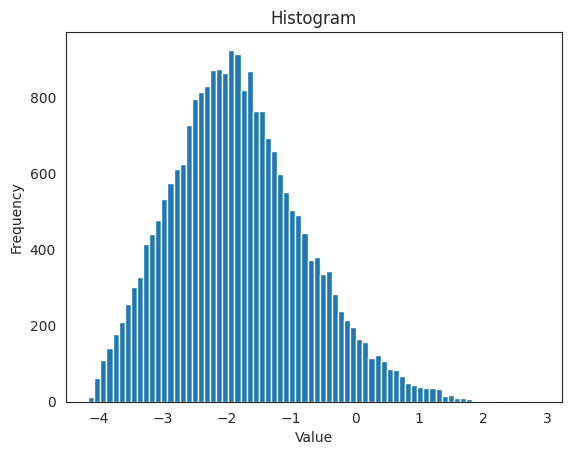

In [ ]:
normalized_neurons_std = np.log(neurons_std)

plt.hist(normalized_neurons_std, bins='auto')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')

# Show the plot
plt.show()

In [ ]:
bins = pd.cut(normalized_neurons_std, bins=4, labels=False)

In [ ]:
bins

array([0, 0, 0, ..., 0, 0, 2])

In [ ]:
temp = ornt.T
#temp = temp.iloc[:, :-3]
temp = temp.iloc[:-2, :]
temp['bins'] = bins

In [ ]:
temp

0         1         2         3         4         5         6  \
0     -0.524084 -0.490164 -0.480400 -0.486658 -0.517005 -0.499940 -0.436507   
1     -0.422406 -0.374765 -0.393381 -0.388131 -0.401151 -0.389771 -0.379575   
2     -0.434198 -0.413133 -0.419157 -0.391207 -0.430815 -0.420666 -0.402868   
3     -0.517501 -0.475651 -0.486385 -0.436392 -0.492796 -0.495085 -0.466820   
4     -0.304082 -0.302903 -0.312032 -0.296117 -0.306747 -0.303461 -0.306255   
...         ...       ...       ...       ...       ...       ...       ...   
23584 -0.251685 -0.203119 -0.198953 -0.207721 -0.251295 -0.176931 -0.216640   
23585 -0.177233 -0.107704 -0.170230 -0.227033 -0.232786 -0.182812 -0.157128   
23586 -0.184964 -0.225336 -0.284048 -0.160286 -0.209193 -0.251432 -0.238930   
23587 -0.140932 -0.103338 -0.105480 -0.113684 -0.117449 -0.140450 -0.139046   
23588  1.356835  0.630849  1.116437  1.036344  0.728786  0.699637  1.077213   

              7         8         9  ...       354       355       356  \
0     -0.505070 -0.508839 -0.501121  ... -0.524330 -0.509958 -0.504082   
1     -0.395247 -0.393081 -0.392107  ... -0.429181 -0.396469 -0.406333   
2     -0.407591 -0.418979 -0.416425  ... -0.431283 -0.413324 -0.425882   
3     -0.492984 -0.493291 -0.488465  ... -0.515967 -0.449481 -0.509313   
4     -0.287997 -0.309040 -0.290075  ... -0.325391 -0.282707 -0.262697   
...         ...       ...       ...  ...       ...       ...       ...   
23584 -0.210888 -0.241464 -0.233637  ... -0.145072 -0.243771 -0.228554   
23585 -0.136561 -0.088193 -0.159556  ... -0.153668 -0.098662 -0.170800   
23586 -0.116152 -0.154319 -0.208733  ... -0.240071 -0.239905 -0.216167   
23587 -0.145867 -0.145220 -0.128731  ... -0.143769 -0.146910 -0.086746   
23588  0.326233  1.697743  0.529388  ...  1.646868  1.999759  0.907560   

            357       358       359     360     361    362  bins  
0     -0.483767 -0.598039 -0.544891   448.0   26.60 -150.0     0  
1     -0.388526 -0.469116 -0.419782  1080.0  119.70 -150.0     0  
2     -0.398228 -0.491440 -0.435189   342.0  200.83 -150.0     0  
3     -0.483406 -0.578607 -0.534037    32.0  591.85 -150.0     0  
4     -0.273206 -0.335197 -0.296872   996.0  208.81 -150.0     0  
...         ...       ...       ...     ...     ...    ...   ...  
23584 -0.161593 -0.194670 -0.319226   482.0  224.77 -450.0     0  
23585 -0.177485 -0.078086 -0.224323  1122.0  139.65 -450.0     0  
23586 -0.255072 -0.180737 -0.229742   221.0  506.73 -450.0     0  
23587 -0.143514 -0.124194 -0.107480   766.0   70.49 -450.0     0  
23588  1.782304  0.677440  0.898364   246.0  166.25 -450.0     2  

[23589 rows x 364 columns]

In [ ]:
temp_3 = temp[temp['bins'] == 3]
temp_2 = temp[temp['bins'] == 2]
temp_1 = temp[temp['bins'] == 1]
temp_0 = temp[temp['bins'] == 0]

In [ ]:
temp_3.index

Index(['5', '33', '45', '49', '57', '63', '66', '68', '75', '92',
       ...
       '21002', '21040', '21244', '22335', '22370', '22390', '22445', '22533',
       '22556', '22603'],
      dtype='object', length=155)

In [ ]:
neuron_indices = temp_3.index  # Indices of neurons to colorize

# Create a list to store colors for each data point
colors = ['red' for i in range(len(temp_0))]

# Create the 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=temp_0.iloc[:, 360],
    y=temp_0.iloc[:, 361],
    z=temp_0.iloc[:, 362],
    mode='markers',
    marker=dict(
        size=5,
        color=colors,  # Use the colors list to specify the colors for each data point
        opacity=0.8
    )
)])

# Update the layout
fig.update_layout(
    scene=dict(
        xaxis=dict(title='X'),
        yaxis=dict(title='Y'),
        zaxis=dict(title='Z')
    ),
    width=800,
    height=600
)

# Show the plot
fig.show()

In [ ]:
temp_3

0          1          2          3          4          5  \
5       1.321716   2.551023  -0.100422   0.986444   1.039882   4.624339   
33     17.623618  19.131280  16.132266  21.710672  14.768728  21.690116   
45      0.907228  -0.229971   0.015142  -0.218780  -0.011144  -0.159758   
49      1.789040   0.540432   0.192181   0.225003   0.509467   0.085173   
57      3.342870   0.970454   1.203001   4.518957   0.263352   0.723342   
...          ...        ...        ...        ...        ...        ...   
22390   0.122098   0.377137  -0.076201  -0.166994   0.028060   0.227454   
22445  -0.220636  -0.064629  -0.254874  -0.230994  -0.109348  -0.229124   
22533  -0.251196  -0.250242  -0.242849  -0.245110  -0.231477  -0.258095   
22556   1.604262   1.672124   1.811244   1.270367   1.391263   1.256736   
22603  -0.225680  -0.213530  -0.270730  -0.234479  -0.236922  -0.247732   

               6          7          8          9  ...        354        355  \
5       0.032063   1.565552   1.966491   1.015429  ...   1.878991   3.706862   
33     13.128099  17.130379  13.436252  16.864407  ...  15.991188  11.139250   
45      1.723982  -0.207077  -0.108849  -0.216918  ...  -0.072352  -0.188629   
49      2.734893   0.092496   1.181706   1.015232  ...   0.507199   1.126895   
57      0.853641   0.055601   1.466091   1.583945  ...   1.256237   4.634985   
...          ...        ...        ...        ...  ...        ...        ...   
22390   0.006263   0.198995  -0.239587   0.621900  ...  -0.113489   0.263468   
22445  -0.184204  -0.207170  -0.220136  -0.106211  ...   0.136347  -0.208434   
22533  -0.240347  -0.236468  -0.239704  -0.227707  ...  -0.224706  -0.187381   
22556   0.165265   0.175255   0.515922   0.113254  ...   7.491595   3.812515   
22603  -0.258353  -0.017377  -0.097855  -0.051544  ...  -0.274324  -0.224393   

             356       357        358        359    360      361    362  bins  
5       3.758592  5.530943   4.018864   2.409672  320.0  178.220 -150.0     3  
33     19.177797  4.972472  18.369027  15.587759   68.0  258.020 -150.0     3  
45      0.105894 -0.163890  -0.237504  -0.141877  100.0   90.440 -150.0     3  
49      1.006664  3.073369   1.357308  -0.049680  170.0   79.800 -150.0     3  
57      1.622033  6.989005   3.443940   3.468382  934.0  578.550 -150.0     3  
...          ...       ...        ...        ...    ...      ...    ...   ...  
22390   0.115127 -0.133981   0.258423   0.026644  358.0  215.460 -450.0     3  
22445  -0.172717 -0.205192  -0.247632  -0.190901  766.0  504.735 -450.0     3  
22533  -0.255472 -0.208265  -0.125984  -0.219721  736.0  140.980 -450.0     3  
22556   3.846017  1.762425   4.208577   4.545760  464.0  295.260 -450.0     3  
22603  -0.258921 -0.042197  -0.108348  -0.245361   44.0  175.560 -450.0     3  

[155 rows x 364 columns]

In [ ]:
degrees = temp.iloc[:, :-4].values.argmax(axis=1)

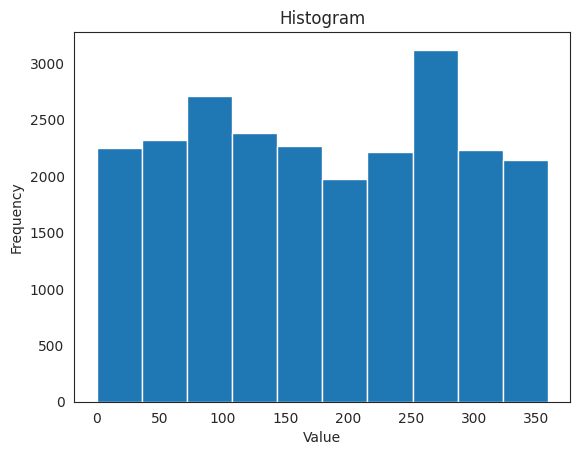

In [ ]:
plt.hist(degrees, bins=10)

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')

# Show the plot
plt.show()

In [ ]:
temp

0         1         2         3         4         5         6  \
0     -0.524084 -0.490164 -0.480400 -0.486658 -0.517005 -0.499940 -0.436507   
1     -0.422406 -0.374765 -0.393381 -0.388131 -0.401151 -0.389771 -0.379575   
2     -0.434198 -0.413133 -0.419157 -0.391207 -0.430815 -0.420666 -0.402868   
3     -0.517501 -0.475651 -0.486385 -0.436392 -0.492796 -0.495085 -0.466820   
4     -0.304082 -0.302903 -0.312032 -0.296117 -0.306747 -0.303461 -0.306255   
...         ...       ...       ...       ...       ...       ...       ...   
23584 -0.251685 -0.203119 -0.198953 -0.207721 -0.251295 -0.176931 -0.216640   
23585 -0.177233 -0.107704 -0.170230 -0.227033 -0.232786 -0.182812 -0.157128   
23586 -0.184964 -0.225336 -0.284048 -0.160286 -0.209193 -0.251432 -0.238930   
23587 -0.140932 -0.103338 -0.105480 -0.113684 -0.117449 -0.140450 -0.139046   
23588  1.356835  0.630849  1.116437  1.036344  0.728786  0.699637  1.077213   

              7         8         9  ...       354       355       356  \
0     -0.505070 -0.508839 -0.501121  ... -0.524330 -0.509958 -0.504082   
1     -0.395247 -0.393081 -0.392107  ... -0.429181 -0.396469 -0.406333   
2     -0.407591 -0.418979 -0.416425  ... -0.431283 -0.413324 -0.425882   
3     -0.492984 -0.493291 -0.488465  ... -0.515967 -0.449481 -0.509313   
4     -0.287997 -0.309040 -0.290075  ... -0.325391 -0.282707 -0.262697   
...         ...       ...       ...  ...       ...       ...       ...   
23584 -0.210888 -0.241464 -0.233637  ... -0.145072 -0.243771 -0.228554   
23585 -0.136561 -0.088193 -0.159556  ... -0.153668 -0.098662 -0.170800   
23586 -0.116152 -0.154319 -0.208733  ... -0.240071 -0.239905 -0.216167   
23587 -0.145867 -0.145220 -0.128731  ... -0.143769 -0.146910 -0.086746   
23588  0.326233  1.697743  0.529388  ...  1.646868  1.999759  0.907560   

            357       358       359     360     361    362  bins  
0     -0.483767 -0.598039 -0.544891   448.0   26.60 -150.0     0  
1     -0.388526 -0.469116 -0.419782  1080.0  119.70 -150.0     0  
2     -0.398228 -0.491440 -0.435189   342.0  200.83 -150.0     0  
3     -0.483406 -0.578607 -0.534037    32.0  591.85 -150.0     0  
4     -0.273206 -0.335197 -0.296872   996.0  208.81 -150.0     0  
...         ...       ...       ...     ...     ...    ...   ...  
23584 -0.161593 -0.194670 -0.319226   482.0  224.77 -450.0     0  
23585 -0.177485 -0.078086 -0.224323  1122.0  139.65 -450.0     0  
23586 -0.255072 -0.180737 -0.229742   221.0  506.73 -450.0     0  
23587 -0.143514 -0.124194 -0.107480   766.0   70.49 -450.0     0  
23588  1.782304  0.677440  0.898364   246.0  166.25 -450.0     2  

[23589 rows x 364 columns]

In [ ]:
len(degrees)

23589

In [ ]:
grouped_degrees = pd.cut(degrees, bins=10, labels=False)
len(grouped_degrees)

23589

In [ ]:
series = pd.Series(grouped_degrees)
series.value_counts()

7    3117
2    2705
3    2381
1    2321
4    2264
0    2247
8    2233
6    2214
9    2139
5    1968
dtype: int64

In [ ]:
grouped_degrees_7 = np.where(grouped_degrees==2)[0]

In [ ]:
# Create a list to store colors for each data point
neuron_indices = grouped_degrees_7  # Indices of neurons to colorize

# Create a list to store colors for each data point
colors = ['blue' if i in grouped_degrees_7 else 'red' for i in range(len(grouped_degrees))]

hue_values = colors

# Create the 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=temp.iloc[:, 360],
    y=temp.iloc[:, 361],
    z=temp.iloc[:, 362],
    mode='markers',
    marker=dict(
        size=5,
        color=hue_values,  # Use the hue_values list to specify the colors for each data point
        colorscale='hsv',  # Use the 'hsv' colorscale
        opacity=0.8
    )
)])

# Update the layout
fig.update_layout(
    scene=dict(
        xaxis=dict(title='X'),
        yaxis=dict(title='Y'),
        zaxis=dict(title='Z')
    ),
    width=800,
    height=600
)

# Show the plot
fig.show()

####tuning curves:

In [ ]:
ornt

0            1           2           3           4           5  \
0     -0.524084    -0.422406   -0.434198   -0.517501   -0.304082    1.321716   
1     -0.490164    -0.374765   -0.413133   -0.475651   -0.302903    2.551023   
2     -0.480400    -0.393381   -0.419157   -0.486385   -0.312032   -0.100422   
3     -0.486658    -0.388131   -0.391207   -0.436392   -0.296117    0.986444   
4     -0.517005    -0.401151   -0.430815   -0.492796   -0.306747    1.039882   
..          ...          ...         ...         ...         ...         ...   
358   -0.598039    -0.469116   -0.491440   -0.578607   -0.335197    4.018864   
359   -0.544891    -0.419782   -0.435189   -0.534037   -0.296872    2.409672   
360  448.000000  1080.000000  342.000000   32.000000  996.000000  320.000000   
361   26.600000   119.700000  200.830000  591.850000  208.810000  178.220000   
362 -150.000000  -150.000000 -150.000000 -150.000000 -150.000000 -150.000000   

              6           7           8           9  ...       23581  \
0     -0.265232   -0.290475   -0.359043   -0.235711  ...   -0.157381   
1     -0.261265   -0.294822   -0.347697   -0.244089  ...   -0.046227   
2     -0.284580   -0.300564   -0.403820   -0.261159  ...   -0.100813   
3     -0.245824   -0.278914   -0.369421   -0.267381  ...   -0.137566   
4     -0.238154   -0.282521   -0.329628   -0.275438  ...   -0.133857   
..          ...         ...         ...         ...  ...         ...   
358   -0.237379   -0.315001   -0.439188   -0.312785  ...   -0.153582   
359   -0.234060   -0.273613   -0.396815   -0.271127  ...   -0.156755   
360  950.000000  766.000000  824.000000  294.000000  ...  452.000000   
361   54.530000  133.000000  281.960000  381.710000  ...  382.375000   
362 -150.000000 -150.000000 -150.000000 -150.000000  ... -450.000000   

           23582       23583       23584        23585       23586       23587  \
0      -0.108041   -0.176854   -0.251685    -0.177233   -0.184964   -0.140932   
1      -0.068034   -0.116202   -0.203119    -0.107704   -0.225336   -0.103338   
2      -0.078687   -0.166296   -0.198953    -0.170230   -0.284048   -0.105480   
3      -0.053585   -0.125649   -0.207721    -0.227033   -0.160286   -0.113684   
4      -0.117552   -0.194262   -0.251295    -0.232786   -0.209193   -0.117449   
..           ...         ...         ...          ...         ...         ...   
358    -0.161846   -0.187220   -0.194670    -0.078086   -0.180737   -0.124194   
359     0.052043   -0.140677   -0.319226    -0.224323   -0.229742   -0.107480   
360  1046.000000  486.000000  482.000000  1122.000000  221.000000  766.000000   
361   363.755000   15.960000  224.770000   139.650000  506.730000   70.490000   
362  -450.000000 -450.000000 -450.000000  -450.000000 -450.000000 -450.000000   

          23588      degree        run  
0      1.356835    0.487468  15.916495  
1      0.630849    1.566261  13.937540  
2      1.116437    2.527949  15.601323  
3      1.036344    3.600979  22.240685  
4      0.728786    4.609790  11.492642  
..          ...         ...        ...  
358    0.677440  358.627039  14.869432  
359    0.898364  359.279351   8.339144  
360  246.000000         NaN        NaN  
361  166.250000         NaN        NaN  
362 -450.000000         NaN        NaN  

[363 rows x 23591 columns]

#####utility functions:

In [ ]:
def mirroring(neuron, flip = False):

  responses = []

  for degree in range((len(ornt)-3)//2):
    resp_1 = ornt.iloc[degree, neuron]
    resp_2 = ornt.iloc[degree+180, neuron]
    if flip:
      responses.append(np.mean([resp_1, resp_2]) * -1)
    else:
      responses.append(np.mean([resp_1, resp_2]))


  return responses

In [ ]:
def min_max_scaling(data):
    min_value = min(data)
    max_value = max(data)
    scaled_data = [(x - min_value) / (max_value - min_value) * 2 - 1 for x in data]
    return scaled_data

In [ ]:
import numpy as np
from sklearn.preprocessing import RobustScaler

def robust_scaling(data):
    # Reshape the data to a 2D array (required by RobustScaler)
    data = np.array(data).reshape(-1, 1)

    # Create a RobustScaler object
    scaler = RobustScaler()

    # Fit and transform the data using Robust Scaling
    scaled_data = scaler.fit_transform(data)

    # Reshape back to 1D array and return the scaled data
    return scaled_data.flatten()

In [ ]:
def power_transformation(data, power=1):
    # Apply the power transformation to the data
    transformed_data = np.power(data, power)

    return transformed_data

#####fitting using sine wave function:

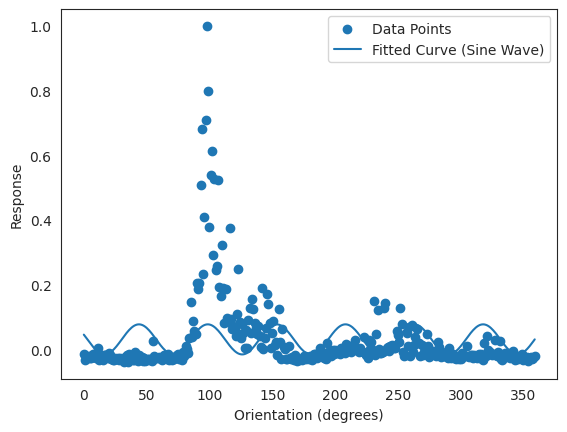

Preferred Orientation (Sine Wave): 45.76170526408669
Selectivity Index (Sine Wave): 4.938603349005505


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the sine wave function
def sine_wave(theta, A, B, C, D):
    return A * np.sin(B * theta + C) + D

# Define your data points
theta = ornt.index[:-3].values  # Orientation values
response = ornt.iloc[:-3, 356].values  # Response values

# Normalize the response data to be in the range of -1 to 1
response /= np.max(np.abs(response))

# Scale the data points
theta_scaled = np.radians(theta) / np.max(np.radians(theta))  # Scale the orientation values

# Estimate initial parameter values based on data characteristics
max_response = np.max(response)
mean_orientation = np.mean(theta_scaled)
initial_guess = [max_response, 2 * np.pi / (theta_scaled[-1] - theta_scaled[0]), 0, 0]  # Initial parameter guesses
params, _ = curve_fit(sine_wave, np.radians(theta), response, p0=initial_guess, maxfev=1000000)

# Extract the fitted parameters
A_fit, B_fit, C_fit, D_fit = params

# Plot the original data points and the fitted tuning curve
plt.scatter(theta, response, label='Data Points')
plt.plot(theta, sine_wave(np.radians(theta), A_fit, B_fit, C_fit, D_fit), label='Fitted Curve (Sine Wave)')
plt.xlabel('Orientation (degrees)')
plt.ylabel('Response')
plt.legend()
plt.show()

# Extract the preferred orientation and selectivity index for the sine wave
preferred_orientation = (np.pi / B_fit) - C_fit  # Convert back to degrees
selectivity_index = (A_fit - D_fit) / (A_fit + D_fit)

print("Preferred Orientation (Sine Wave):", np.degrees(preferred_orientation))
print("Selectivity Index (Sine Wave):", selectivity_index)


#####fitting using bimodal Gaussian function:

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning:

Covariance of the parameters could not be estimated



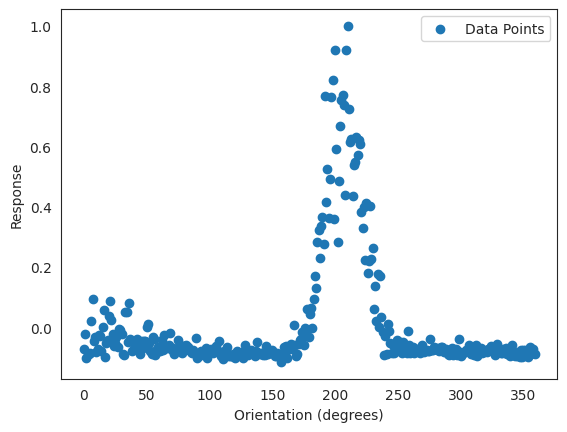

Preferred Orientation 1 (Bimodal Gaussian): 101.07834546298282
Selectivity Index 1 (Bimodal Gaussian): 0.020226630414036797
Preferred Orientation 2 (Bimodal Gaussian): 10341.888202111359
Selectivity Index 2 (Bimodal Gaussian): 1.000000313581183


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the bimodal Gaussian function
def bimodal_gaussian(theta, A1, mu1, sigma1, A2, mu2, sigma2):
    gaussian1 = A1 * np.exp(-0.5 * ((theta - mu1) / sigma1) ** 2)
    gaussian2 = A2 * np.exp(-0.5 * ((theta - mu2) / sigma2) ** 2)
    return gaussian1 + gaussian2


# Define your data points
theta = ornt.index[:-3].values  # Orientation values
response = ornt.iloc[:-3, 574].values  # Response values

# Normalize the response data to be in the range of -1 to 1
response /= np.max(np.abs(response))

# Scale the data points
theta_scaled = np.radians(theta) / np.max(np.radians(theta))  # Scale the orientation values

# Estimate initial parameter values based on data characteristics
max_response = np.max(response)
mean_orientation = np.mean(theta_scaled)
std_orientation = np.std(theta_scaled)
initial_guess = [max_response, mean_orientation, std_orientation, max_response, mean_orientation + 180, std_orientation]  # Initial parameter guesses
params, _ = curve_fit(bimodal_gaussian, np.radians(theta), response, p0=initial_guess, maxfev=1000000)

# Extract the fitted parameters
A1_fit, mu1_fit, sigma1_fit, A2_fit, mu2_fit, sigma2_fit = params

# Plot the original data points and the fitted tuning curve
plt.scatter(theta, response, label='Data Points')
#plt.plot(theta, bimodal_gaussian(np.radians(theta), A1_fit, mu1_fit, sigma1_fit, A2_fit, mu2_fit, sigma2_fit), label='Fitted Curve (Bimodal Gaussian)')
plt.xlabel('Orientation (degrees)')
plt.ylabel('Response')
plt.legend()
plt.show()

# Extract the preferred orientations and selectivity index for each Gaussian
preferred_orientation1 = mu1_fit
preferred_orientation2 = mu2_fit
selectivity_index1 = (A1_fit - bimodal_gaussian(np.radians(preferred_orientation1 + 90), A1_fit, mu1_fit, sigma1_fit, A2_fit, mu2_fit, sigma2_fit)) / (A1_fit + bimodal_gaussian(np.radians(preferred_orientation1 + 90), A1_fit, mu1_fit, sigma1_fit, A2_fit, mu2_fit, sigma2_fit))
selectivity_index2 = (A2_fit - bimodal_gaussian(np.radians(preferred_orientation2 + 90), A1_fit, mu1_fit, sigma1_fit, A2_fit, mu2_fit, sigma2_fit)) / (A2_fit + bimodal_gaussian(np.radians(preferred_orientation2 + 90), A1_fit, mu1_fit, sigma1_fit, A2_fit, mu2_fit, sigma2_fit))

print("Preferred Orientation 1 (Bimodal Gaussian):", np.degrees(preferred_orientation1))
print("Selectivity Index 1 (Bimodal Gaussian):", selectivity_index1)
print("Preferred Orientation 2 (Bimodal Gaussian):", np.degrees(preferred_orientation2))
print("Selectivity Index 2 (Bimodal Gaussian):", selectivity_index2)


#####fiting using polynomial regression:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

def calculate_orientation_tuning_selectivity(col_index, degree=2, to_plot = False):

    y = mirroring(col_index)
    X = np.arange(len(y))

    #y /= np.max(np.abs(y))

    #y = min_max_scaling(y)

    #y = robust_scaling(y)

    #y = power_transformation(y, power=7)

    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X.reshape(-1, 1))

    model = LinearRegression()
    model.fit(X_poly, y)

    X_range = np.linspace(X.min(), X.max(), 180)
    X_range_poly = poly_features.transform(X_range.reshape(-1, 1))
    y_pred = model.predict(X_range_poly)

    mu_fit = model.predict(X_poly)

    preferred_orientation = X_range[np.argmax(y_pred)]

    preferred_orientation = int(preferred_orientation)

    orthogonal_orientation = (preferred_orientation + 90) % 180
    orientation_tuning_index = (y_pred[np.argmax(y_pred)] - y_pred[np.argmin(np.abs(X_range - orthogonal_orientation))]) / (y_pred[np.argmax(y_pred)])

    if to_plot:

      plt.scatter(X, y, label='Data Points')
      plt.plot(X_range, y_pred, color='red', label=f'Polynomial Regression (Degree {degree})')
      plt.xlabel('Orientation (degrees)')
      plt.ylabel('Response')
      plt.title('Polynomial Regression for neuron: ' + str(col_index))
      plt.legend()

    return preferred_orientation, orientation_tuning_index, X_range, y_pred

Preferred Orientation: 108
Orientation Tuning Selectivity Index: 1.145


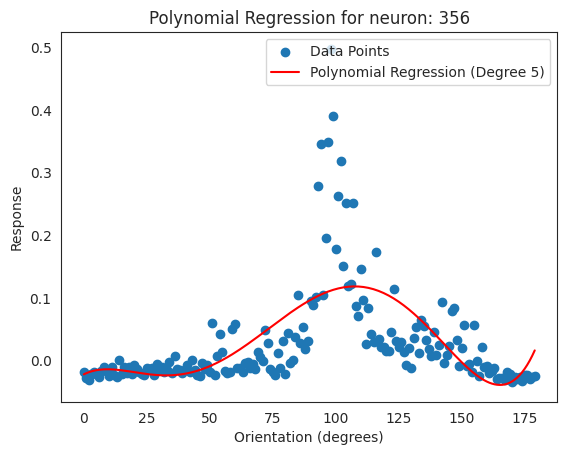

In [ ]:
preferred_orientation, otsi, X_range, y_pred = calculate_orientation_tuning_selectivity(356, degree=5, to_plot=True)
print(f"Preferred Orientation: {preferred_orientation}")
print(f"Orientation Tuning Selectivity Index: {otsi:.3f}")

plt.show()

#####fitting using von Mises function:

In [ ]:
import numpy as np
from scipy.optimize import curve_fit

def calculate_orientation_tuning_selectivity_von_mises(col_index,  to_plot = False):

  # Define the von Mises function
  def von_mises(theta, A, k, mu):
      return A * np.exp(k * np.cos(theta - mu))


  mirror = mirroring(col_index)

  theta = np.arange(len(mirror))

  response = mirror

  #response /= np.max(np.abs(mirror))

  #response = min_max_scaling(mirror)

  #response = robust_scaling(mirror)

  response = power_transformation(mirror, power=3)

  # Scale the data points
  theta_scaled = np.radians(theta) / np.max(np.radians(theta))  # Scale the orientation values

  # Estimate initial parameter values based on data characteristics
  max_response = np.max(response)
  mean_orientation = np.mean(theta_scaled)
  initial_guess = [max_response, 1, mean_orientation]  # Initial parameter guesses
  # Set bounds for the parameters to prevent divergence
  lower_bounds = [0, 0, -np.pi]
  upper_bounds = [2 * max_response, 10, np.pi]

  try:
        params, _ = curve_fit(von_mises, np.radians(theta), response, p0=initial_guess, maxfev=1000000)

        if np.isnan(params[0]):

          response = power_transformation(mirror, power=2)
          # Estimate initial parameter values based on data characteristics
          max_response = np.max(response)
          mean_orientation = np.mean(theta_scaled)
          initial_guess = [max_response, 1, mean_orientation]  # Initial parameter guesses
          params, _ = curve_fit(von_mises, np.radians(theta), response, p0=initial_guess, bounds=(lower_bounds, upper_bounds), maxfev=1000000)


  except RuntimeError:
      #response /= np.max(np.abs(mirror))

      #response = min_max_scaling(mirror)

      #response = robust_scaling(mirror)

      response = power_transformation(mirror, power=2)
      # Estimate initial parameter values based on data characteristics
      max_response = np.max(response)
      mean_orientation = np.mean(theta_scaled)
      initial_guess = [max_response, 1, mean_orientation]  # Initial parameter guesses
      params, _ = curve_fit(von_mises, np.radians(theta), response, p0=initial_guess, bounds=(lower_bounds, upper_bounds), maxfev=1000000)

  except ValueError:
        #response /= np.max(np.abs(mirror))

        #response = min_max_scaling(mirror)

        #response = robust_scaling(mirror)

        response = power_transformation(mirror, power=2)
        # Estimate initial parameter values based on data characteristics
        max_response = np.max(response)
        mean_orientation = np.mean(theta_scaled)
        initial_guess = [0, 1, 1]  # Initial parameter guesses
        params, _ = curve_fit(von_mises, np.radians(theta), response, p0=initial_guess, bounds=(lower_bounds, upper_bounds), maxfev=1000000)


  # Extract the fitted parameters
  A_fit, k_fit, mu_fit = params

  if to_plot:

        plt.scatter(theta, response, label='Data Points')
        plt.plot(theta, von_mises(np.radians(theta), A_fit, k_fit, mu_fit), label='Fitted Curve')
        plt.xlabel('Orientation (degrees)')
        plt.ylabel('Response')
        plt.legend()
        plt.show()

  # Extract the preferred orientation and selectivity index
  fit = von_mises(np.radians(theta), A_fit, k_fit, mu_fit)
  #preferred_orientation, _, _, _ = calculate_orientation_tuning_selectivity(col_index, degree=3)
  preferred_orientation =  np.degrees(mu_fit)
  preferred_orientation = (preferred_orientation + 180) % 180
  preferred_orientation = int(preferred_orientation)
  orthogonal_orientation = (preferred_orientation + 90) % 180
  selectivity_index = (A_fit - von_mises(np.radians(orthogonal_orientation), A_fit, k_fit, mu_fit)) / (A_fit + von_mises(np.radians(orthogonal_orientation), A_fit, k_fit, mu_fit))

  return preferred_orientation, selectivity_index

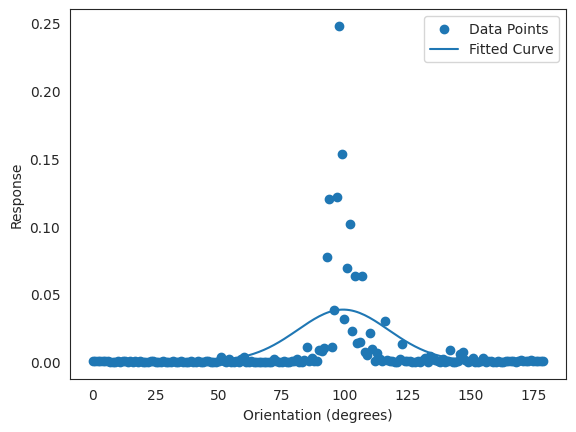

Preferred Orientation: 99
Orientation Tuning Selectivity Index: 0.040


In [ ]:
preferred_orientation, selectivity_index = calculate_orientation_tuning_selectivity_von_mises(356, to_plot=True)

print(f"Preferred Orientation: {preferred_orientation}")
print(f"Orientation Tuning Selectivity Index: {selectivity_index:.3f}")


plt.show()

#####fitting all data:

In [ ]:
# Initialize an empty list to store the selectivity indices
selectivity_indices = []

# Initialize an empty list to store the preferred orientations in degrees
preferred_orientations = []

# Iterate over each column of the ornt dataframe
for neuron in range(len(ornt.columns) - 2):

        preferred_orientation, selectivity_index = calculate_orientation_tuning_selectivity_von_mises(int(neuron))

        preferred_orientations.append(preferred_orientation)

        selectivity_indices.append(selectivity_index)

        print("\n" + "Neuron:" + str(neuron)+ "\t" + "Preferred Orientation:" + str(preferred_orientation) + "\t" + "Selectivity Index:" + str(selectivity_index) + "\n")

Streaming output truncated to the last 5000 lines.
Neuron:3636	Preferred Orientation:83	Selectivity Index:-0.5127524631216976


Neuron:3637	Preferred Orientation:99	Selectivity Index:-0.0014727011765432029


Neuron:3638	Preferred Orientation:95	Selectivity Index:-0.02734696258134318


Neuron:3639	Preferred Orientation:0	Selectivity Index:1.9791119668125e-14


Neuron:3640	Preferred Orientation:100	Selectivity Index:-0.0021632230503323257


Neuron:3641	Preferred Orientation:93	Selectivity Index:-0.0025618531221037167


Neuron:3642	Preferred Orientation:36	Selectivity Index:-0.14776777053713855


Neuron:3643	Preferred Orientation:72	Selectivity Index:-0.8673576354923467


Neuron:3644	Preferred Orientation:111	Selectivity Index:0.006326264040783074


Neuron:3645	Preferred Orientation:116	Selectivity Index:0.5977659739395919


Neuron:3646	Preferred Orientation:102	Selectivity Index:-0.0014622838430116802


Neuron:3647	Preferred Orientation:50	Selectivity Index:0.0033230856507109954


Neuron

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning:

Covariance of the parameters could not be estimated



Streaming output truncated to the last 5000 lines.
Neuron:21922	Preferred Orientation:62	Selectivity Index:-0.016940865832327012


Neuron:21923	Preferred Orientation:131	Selectivity Index:0.008861508285421284


Neuron:21924	Preferred Orientation:134	Selectivity Index:0.00038713765831135965


Neuron:21925	Preferred Orientation:91	Selectivity Index:-0.00092234008688134


Neuron:21926	Preferred Orientation:29	Selectivity Index:-0.4948533363534461


Neuron:21927	Preferred Orientation:28	Selectivity Index:-0.028236525339386243


Neuron:21928	Preferred Orientation:64	Selectivity Index:-0.0033078099597948305


Neuron:21929	Preferred Orientation:89	Selectivity Index:0.005988130105844882


Neuron:21930	Preferred Orientation:107	Selectivity Index:-0.00021416606833646537


Neuron:21931	Preferred Orientation:141	Selectivity Index:0.06531384410352407


Neuron:21932	Preferred Orientation:93	Selectivity Index:-0.00013463163771140332


Neuron:21933	Preferred Orientation:87	Selectivity Index:0.00017397

#####analysis for selectivity indices:

<Axes: >

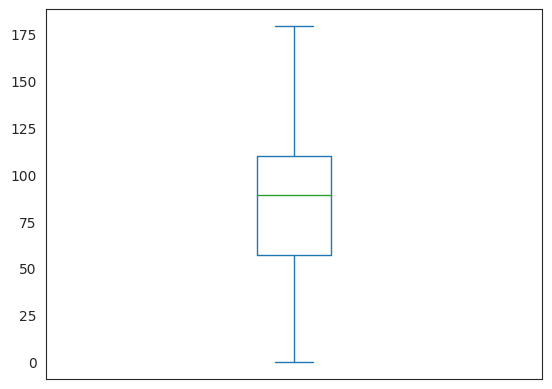

In [ ]:
x = pd.Series(preferred_orientations)
#x[x < -1] = -1
#x[x > 1] = 1
#x.isna().value_counts()
#x = x[x.isna() == True]
#x =  map_to_minus_one_to_one(x)
#x = power_transformation(x, power=5)
#x = min_max_scaling(list(x))
#x = pd.Series(x)
x.plot.box()

In [ ]:
x = pd.Series(selectivity_indices)
#x[x < -1] = -1
#x[x > 1] = 1
#x.isna().value_counts()
#x = x[x.isna() == True]
#x =  map_to_minus_one_to_one(x)
#x = power_transformation(x, power=5)
#x = min_max_scaling(list(x))
#x = pd.Series(x)
x.plot.box()

In [ ]:
x.isna().value_counts()

In [ ]:
x.quantile(0.75)  - x.quantile(0.25)

In [ ]:
x.nsmallest(1500)

In [ ]:
x.nlargest(1000)

In [ ]:
x.plot()

In [ ]:
sns.set_style("white")
sns.histplot(x, color='steelblue', edgecolor='black', kde=True)
plt.title("Histogram", fontsize=16)
plt.xlabel("Orientation Selectivity Index (OSI)", fontsize=12)
plt.ylabel("# of neurons", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.despine()
plt.tight_layout()
plt.show()

In [ ]:
sns.set_style("white")
sns.histplot(preferred_orientations, color='steelblue', edgecolor='black', kde=True)
plt.title("Histogram", fontsize=16)
plt.xlabel("Degrees", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.despine()
plt.tight_layout()
plt.show()

#####saving the results:

In [ ]:
import pandas as pd

# Create a DataFrame with the common length
#preferred_orientations = pd.DataFrame({'preferred_degrees': preferred_orientations})
#selectivity_indices = pd.DataFrame({'selectivity_indices': selectivity_indices})

# Save the DataFrame to a CSV file
preferred_orientations.to_csv('/content/drive/MyDrive/Stringer-spontaneous-Project-(Analysis)/dataset/dataset-files/stringer-orientations/preferred_degrees_final.csv', index=False)
selectivity_indices.to_csv('/content/drive/MyDrive/Stringer-spontaneous-Project-(Analysis)/dataset/dataset-files/stringer-orientations/selectivity_data_final.csv', index=False)

#####filtering selective neurons:

In [ ]:
selectivity_indices = pd.read_csv('/content/drive/MyDrive/Stringer-spontaneous-Project-(Analysis)/dataset/dataset-files/stringer-orientations/selectivity_data_final.csv')
preferred_degrees = pd.read_csv('/content/drive/MyDrive/Stringer-spontaneous-Project-(Analysis)/dataset/dataset-files/stringer-orientations/preferred_degrees_final.csv')

In [ ]:
selectivity_indices_grouped = pd.cut(selectivity_indices['selectivity_indices'], bins=3, labels=False)
preferred_degrees_grouped = pd.cut(preferred_degrees['preferred_degrees'], bins=6, labels=False)
selectivity_indices_all = selectivity_indices['selectivity_indices']
preferred_degrees_all = preferred_degrees['preferred_degrees']

In [ ]:
temp = ornt.T

In [ ]:
selectivity_indices_grouped.value_counts()

In [ ]:
for i in range(2):
  selectivity_indices_grouped = selectivity_indices_grouped.append(pd.Series([-1]), ignore_index=True)
  preferred_degrees_grouped = preferred_degrees_grouped.append(pd.Series([-1]), ignore_index=True)
  selectivity_indices_all = selectivity_indices_all.append(pd.Series([-1]), ignore_index=True)
  preferred_degrees_all = preferred_degrees_all.append(pd.Series([-1]), ignore_index=True)

In [ ]:
temp['selective_neurons'] = selectivity_indices_grouped.values
temp['preferred_degrees'] = preferred_degrees_grouped.values
temp['selectivity_indices'] = selectivity_indices_all.values
temp['preferred_degrees_all'] = preferred_degrees_all.values

In [ ]:
temp['selective_neurons']

In [ ]:
ornt_selective = temp[(temp['selective_neurons'] != 1) & (temp['selective_neurons'] != -1)].T

In [ ]:
ornt_selective

####neural selectivity and spatial coordinates:

In [ ]:
ornt_selective

#####for all neurons:

######along all axes:

In [ ]:
selectivity_indices_grouped = pd.cut(selectivity_indices['selectivity_indices'], bins=3, labels=False)

In [ ]:
import numpy as np
import plotly.graph_objs as go

# Generate sample 3D data (replace this with your actual data)
x = ornt.iloc[-3, :-2]
y = ornt.iloc[-2, :-2]
z = ornt.iloc[-1, :-2]

# Generate a numpy array with values between -1 and 1 (replace this with your actual data)
color_data = selectivity_indices_grouped

# Define the colormap
colormap = 'RdBu'  # Use a valid colorscale name

# Create a 3D scatter plot using Plotly
trace = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=5,
        color=color_data,
        colorscale=colormap,
        cmin=-0,  # Update this based on the minimum value of color_data
        cmax=2,   # Update this based on the maximum value of color_data
        colorbar=dict(title='Selectivity Index Range')
    )
)

# Create the layout and set axis labels (replace with your actual labels)
layout = go.Layout(
    scene=dict(
        xaxis_title='X Label',
        yaxis_title='Y Label',
        zaxis_title='Z Label'
    ),
    title='Selectivity Index neurons'  # Add the title here
)

# Create the figure and add the scatter trace with the layout
fig = go.Figure(data=[trace], layout=layout)

# Show the plot
fig.show()


In [ ]:
import numpy as np
import plotly.graph_objs as go

# Generate sample 3D data (replace this with your actual data)
x = ornt.iloc[-3, :-2]
y = ornt.iloc[-2, :-2]
z = ornt.iloc[-1, :-2]

# Generate a numpy array with values between -1 and 1 (replace this with your actual data)
color_data = selectivity_indices['selectivity_indices']

# Define the colormap
colormap = 'RdBu'  # Use a valid colorscale name

# Create a 3D scatter plot using Plotly
trace = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=5,
        color=color_data,
        colorscale=colormap,
        cmin=-1,  # Update this based on the minimum value of color_data
        cmax=1,   # Update this based on the maximum value of color_data
        colorbar=dict(title='Selectivity Index Range')
    )
)

# Create the layout and set axis labels (replace with your actual labels)
layout = go.Layout(
    scene=dict(
        xaxis_title='X Label',
        yaxis_title='Y Label',
        zaxis_title='Z Label'
    ),
    title='Selectivity Index neurons'  # Add the title here
)

# Create the figure and add the scatter trace with the layout
fig = go.Figure(data=[trace], layout=layout)

# Show the plot
fig.show()


In [ ]:
preferred_degrees_grouped = pd.cut(preferred_degrees['preferred_degrees'], bins=6, labels=False)

In [ ]:
import numpy as np
import plotly.graph_objs as go

# Generate sample 3D data (replace this with your actual data)
x = ornt.iloc[-3, :-2]
y = ornt.iloc[-2, :-2]
z = ornt.iloc[-1, :-2]

# Generate a numpy array with values between -1 and 1 (replace this with your actual data)
color_data = preferred_degrees_grouped

# Define the colormap
colormap = 'hsv'  # Use a valid colorscale name

# Create a 3D scatter plot using Plotly
trace = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=5,
        color=color_data,
        colorscale=colormap,
        cmin=0,  # Update this based on the minimum value of color_data
        cmax=5,   # Update this based on the maximum value of color_data
        colorbar=dict(title='Degrees Range')
    )
)

# Create the layout and set axis labels (replace with your actual labels)
layout = go.Layout(
    scene=dict(
        xaxis_title='X Label',
        yaxis_title='Y Label',
        zaxis_title='Z Label'
    ),
    title='Orientation Selectivity Map'  # Add the title here
)

# Create the figure and add the scatter trace with the layout
fig = go.Figure(data=[trace], layout=layout)

# Show the plot
fig.show()


######along each axis:

In [ ]:
x = ornt.iloc[-3, :-2]

In [ ]:
plt.scatter(x, selectivity_indices, label='Data Points')
plt.xlabel('x-axis')
plt.ylabel('Selectivity Indix')
plt.title('Selectivity Indix Along x-axis: ')
plt.legend()

In [ ]:
y = ornt.iloc[-2, :-2]

In [ ]:
plt.scatter(y, selectivity_indices, label='Data Points')
plt.xlabel('y-axis')
plt.ylabel('Selectivity Indix')
plt.title('Selectivity Indix Along y-axis: ')
plt.legend()

In [ ]:
z = ornt.iloc[-1, :-2]

In [ ]:
plt.scatter(z, selectivity_indices, label='Data Points')
plt.xlabel('z-axis')
plt.ylabel('Selectivity Indix')
plt.title('Selectivity Indix Along z-axis: ')
plt.legend()

#####for selective neurons:

######along all axes:

In [ ]:
s = ornt_selective.iloc[-4, :]
s[s == 0] = 1
s[s == 2] = -1

In [ ]:
import numpy as np
import plotly.graph_objs as go

# Generate sample 3D data (replace this with your actual data)
x = ornt_selective.iloc[-7, :]
y = ornt_selective.iloc[-6, :]
z = ornt_selective.iloc[-5, :]

# Generate a numpy array with values between -1 and 1 (replace this with your actual data)
color_data = s
# Define the colormap
colormap = 'RdBu'  # Use a valid colorscale name

# Create a 3D scatter plot using Plotly
trace = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=5,
        color=color_data,
        colorscale=colormap,
        cmin=-1,  # Update this based on the minimum value of color_data
        cmax=1,   # Update this based on the maximum value of color_data
        colorbar=dict(title='Selectivity Index Range')
    )
)

# Create the layout and set axis labels (replace with your actual labels)
layout = go.Layout(
    scene=dict(
        xaxis_title='X Label',
        yaxis_title='Y Label',
        zaxis_title='Z Label'
    ),
    title='Selectivity Index neurons'  # Add the title here
)

# Create the figure and add the scatter trace with the layout
fig = go.Figure(data=[trace], layout=layout)

# Show the plot
fig.show()


In [ ]:
o = ornt_selective.iloc[-3, :]
o = o + 1
o = o * 30
o

28       120.0
59       120.0
74        90.0
75        90.0
76        90.0
         ...  
23518    150.0
23532    150.0
23550    150.0
23556    120.0
23572    150.0
Name: preferred_degrees, Length: 2962, dtype: float64

In [ ]:
import numpy as np
import plotly.graph_objs as go

# Generate sample 3D data (replace this with your actual data)
x = ornt_selective.iloc[-7, :]
y = ornt_selective.iloc[-6, :]
z = ornt_selective.iloc[-5, :]

# Generate a numpy array with values between -1 and 1 (replace this with your actual data)
color_data = o

# Define the colormap
colormap = 'hsv'  # Use a valid colorscale name

# Create a 3D scatter plot using Plotly
trace = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=5,
        color=color_data,
        colorscale=colormap,
        cmin=0,  # Update this based on the minimum value of color_data
        cmax=180,   # Update this based on the maximum value of color_data
        colorbar=dict(title='Degrees Range')
    )
)

# Create the layout and set axis labels (replace with your actual labels)
layout = go.Layout(
    scene=dict(
        xaxis_title='X Label',
        yaxis_title='Y Label',
        zaxis_title='Z Label'
    ),
    title='Orientation Selectivity Map'  # Add the title here
)

# Create the figure and add the scatter trace with the layout
fig = go.Figure(data=[trace], layout=layout)

# Show the plot
fig.show()


######along each axis:

In [ ]:
x = ornt_selective.iloc[-6, :]
selectivity_indix = ornt_selective.iloc[-1, :]

In [ ]:
plt.scatter(x, selectivity_indix, label='Data Points')
plt.xlabel('x-axis')
plt.ylabel('Selectivity Indix')
plt.title('Selectivity Indix Along x-axis: ')
plt.legend()

In [ ]:
y = ornt_selective.iloc[-5, :]
selectivity_indix = ornt_selective.iloc[-1, :]

In [ ]:
plt.scatter(y, selectivity_indix, label='Data Points')
plt.xlabel('y-axis')
plt.ylabel('Selectivity Indix')
plt.title('Selectivity Indix Along y-axis: ')
plt.legend()

In [ ]:
z = ornt_selective.iloc[-4, :]
selectivity_indix = ornt_selective.iloc[-1, :]

In [ ]:
plt.scatter(z, selectivity_indix, label='Data Points')
plt.xlabel('z-axis')
plt.ylabel('Selectivity Indix')
plt.title('Selectivity Indix Along z-axis: ')
plt.legend()

####statistical analysis:

#####Descriptive Statistics:

In [ ]:
mean_selectivity = np.mean(selectivity_indices['selectivity_indices'])
median_selectivity = np.median(selectivity_indices['selectivity_indices'])
std_selectivity = np.std(selectivity_indices['selectivity_indices'])

print("Mean Selectivity Index:", mean_selectivity)
print("Median Selectivity Index:", median_selectivity)
print("Standard Deviation of Selectivity Index:", std_selectivity)

In [ ]:
mean_degrees = np.mean(preferred_degrees['preferred_degrees'])
median_degrees = np.median(preferred_degrees['preferred_degrees'])
std_degrees = np.std(preferred_degrees['preferred_degrees'])

print("Mean Preferred Degrees:", mean_degrees)
print("Median Preferred Degrees:", median_degrees)
print("Standard Deviation of Preferred Degrees:", std_degrees)

##### iqr:

In [ ]:
selectivity_indices['selectivity_indices'].plot.box()

In [ ]:
Q1 = selectivity_indices['selectivity_indices'].quantile(0.33)
Q2 = selectivity_indices['selectivity_indices'].quantile(0.66)
#Q3 = selectivity_indices['selectivity_indices'].quantile(0.)

IQR = Q2 - Q1

print("Interquartile Range (Q1) of Selectivity Indices:", Q1)
print("Interquartile Range (Q2) of Selectivity Indices:", Q2)
print("Interquartile Range (IQR) of Selectivity Indices:", IQR)

In [ ]:
len(selectivity_indices['selectivity_indices'][(selectivity_indices['selectivity_indices'] <= -0.5)]) / len(selectivity_indices['selectivity_indices'])

In [ ]:
len(selectivity_indices['selectivity_indices'][(selectivity_indices['selectivity_indices'] >= 0.5)]) / len(selectivity_indices['selectivity_indices'])

In [ ]:
len(selectivity_indices['selectivity_indices'][(selectivity_indices['selectivity_indices'] <= 0.5) & ((selectivity_indices['selectivity_indices'] >= -0.5))]) / len(selectivity_indices['selectivity_indices'])

#####spatial position:

In [ ]:
x_positions = ornt.iloc[-3, :]
y_positions = ornt.iloc[-2, :]
z_positions = ornt.iloc[-1, :]

######spatial position mean:

In [ ]:
x_mean = np.mean(x_positions)
y_mean = np.mean(y_positions)
z_mean = np.mean(z_positions)
print('spatial x positions mean: ' + str(x_mean))
print('spatial y positions mean: ' + str(y_mean))
print('spatial z positions mean: ' + str(z_mean))

######spatial position variance:

In [ ]:
x_var = np.var(x_positions)
y_var = np.var(y_positions)
z_var = np.var(z_positions)
print('Spatial x position variance:', x_var)
print('Spatial y position variance:', y_var)
print('Spatial z position variance:', z_var)

In [ ]:
weighted_sum_x = np.sum([preferred_degrees['preferred_degrees'].iloc[i] * x_positions[i] for i in range(len(preferred_degrees))])
weighted_sum_y = np.sum([preferred_degrees['preferred_degrees'].iloc[i] * y_positions[i] for i in range(len(preferred_degrees))])
weighted_sum_z = np.sum([preferred_degrees['preferred_degrees'].iloc[i] * z_positions[i] for i in range(len(preferred_degrees))])

sum_data_values = np.sum(preferred_degrees['preferred_degrees'])

spatial_mean_x = weighted_sum_x / sum_data_values
spatial_mean_y = weighted_sum_y / sum_data_values
spatial_mean_z = weighted_sum_z / sum_data_values

print("Spatial Mean (x, y, z):", spatial_mean_x, spatial_mean_y, spatial_mean_z)

######spatial position standard deviation:

In [ ]:
x_std = np.std(x_positions)
y_std = np.std(y_positions)
z_std = np.std(z_positions)

print('Spatial x position standard deviation:', x_std)
print('Spatial y position standard deviation:', y_std)
print('Spatial z position standard deviation:', z_std)

In [ ]:
data = preferred_degrees
data_mean = data['preferred_degrees'].mean()

In [ ]:
spatial_variance = np.sum([((data['preferred_degrees'].iloc[i] - data_mean)**2) * (((x_positions[i] - x_mean)**2) + ((y_positions[i] - y_mean)**2) + ((z_positions[i] - z_mean)**2)) for i in range(len(data))]) / len(data)
spatial_std = np.sqrt(spatial_variance)

#####Hypothesis Testing (One-sample t-test):

In [ ]:
mean_resp = ornt.iloc[:-3, :-2].mean()

In [ ]:
from scipy import stats

correlation_coefficient, p_value = stats.pearsonr(selectivity_indices['selectivity_indices'], mean_resp)
correlation_coefficient, p_value

#####ANOVA test:

###salt and pepper?

####validating via spatial coordinates:

In [ ]:
from sklearn.preprocessing import MinMaxScaler

X_data = x = ornt_selective.iloc[-6:-3, :]

# Normalize the data (scaling to a range between 0 and 1)
min_max_scaler = MinMaxScaler()
X_normalized = min_max_scaler.fit_transform(X_data)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have your X data and Y data as separate DataFrames or numpy arrays
X_data = X_normalized.T
Y_data = ornt_selective.iloc[-1, :]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

####validating with running speed:

In [ ]:
neuron_dict = {}

for neuron in ornt_selective.iloc[:, :-6].columns:

  neuron_dict[neuron] = mirroring(int(neuron))

In [ ]:
run_mirrored = mirroring(-1)

In [ ]:
df_mirrored = pd.DataFrame(neuron_dict)
df_mirrored['run'] = run_mirrored

In [ ]:
ornt_selective['selectivity_indices_grouped'] = ornt_selective.T.groupby('preferred_degrees_all').mean()['selectivity_indices']

In [ ]:
ornt_selective.iloc[0, -1] = -0.99
ornt_selective.iloc[175, -1] = 0.8

In [ ]:
df_mirrored['selectivity_indices_grouped'] = ornt_selective.iloc[:-187, -1]

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with two columns 'column1' and 'column2'
# df = pd.DataFrame({'column1': [...], 'column2': [...]})

# Calculate the correlation between the two columns
correlation = df_mirrored['run'].corr(df_mirrored['selectivity_indices_grouped'])
covariance = df_mirrored['run'].cov(df_mirrored['selectivity_indices_grouped'])
# Create the heatmap
sns.heatmap(df_mirrored.iloc[:, -2:].corr(), annot=True, cmap='coolwarm', center=0)

# Add the correlation value to the plot
plt.text(0.5, 1.05, f'Correlation: {correlation:.2f}', ha='center', va='center', transform=plt.gca().transAxes)

# Show the plot
plt.show()

print("Correlation:", correlation)
print("Covariance:", covariance)

###virtual mouse:

####model:

# Fatema

**Trying Circular variance metric**

In [ ]:
import numpy as np
from scipy.stats import circvar
import matplotlib.pyplot as plt

samples_1 = np.array(ornt.iloc[:-3,6])
samples_2 = np.array(ornt.iloc[:-3,9])
circvar_1 = circvar(samples_1)
circvar_2 = circvar(samples_2)

In [ ]:
fig, (left, right) = plt.subplots(ncols=2)
for image in (left, right):
    image.plot(np.cos(np.linspace(0, 2*np.pi, 500)),
               np.sin(np.linspace(0, 2*np.pi, 500)),
               c='k')
    image.axis('equal')
    image.axis('off')
left.scatter(np.cos(samples_1), np.sin(samples_1), c='k', s=15)
left.set_title(f"circular variance: {np.round(circvar_1, 2)!r}")
right.scatter(np.cos(samples_2), np.sin(samples_2), c='k', s=15)
right.set_title(f"circular variance: {np.round(circvar_2, 2)!r}")
plt.show()

In [ ]:
ornt.columns

In [ ]:
ornt_selective

28        59        74        75        76        85        86  \
1   -0.175797  0.093173 -0.097979 -0.210169  0.979460  0.116186 -0.178910   
2   -0.134635 -0.138037 -0.046804 -0.032155  0.113988  0.387400 -0.125021   
3    0.032572 -0.098328 -0.029894 -0.170217  0.028427  0.043531 -0.160633   
4   -0.141964  0.028258 -0.165839 -0.110588 -0.194684  1.344501 -0.161483   
5   -0.138814 -0.126536 -0.137693 -0.049927 -0.114249  0.297039 -0.016679   
..        ...       ...       ...       ...       ...       ...       ...   
174 -0.175488  0.109442 -0.220669  0.093191  0.033850 -0.081831 -0.019870   
176 -0.187208  0.198329 -0.200304 -0.063820  0.020527  0.153934 -0.179664   
177 -0.188934 -0.178883  0.041173 -0.055242  0.149274  0.677121 -0.173320   
178 -0.144063  0.720123 -0.039824  0.195689 -0.195324  0.085025 -0.065251   
179 -0.177672  0.176974 -0.044684  0.309406  0.135507  0.990025 -0.046272   

           96       100       111  ...     23456     23482     23490  \
1   -0.247520 -0.141846 -0.089863  ... -0.185040  0.004874  0.117371   
2   -0.060514 -0.114761 -0.149996  ... -0.119545  0.037791  0.234268   
3   -0.309186 -0.122965 -0.095964  ... -0.000444 -0.007148  0.175848   
4   -0.151453 -0.194555 -0.099698  ... -0.095497 -0.037615  0.102874   
5   -0.378502 -0.121342 -0.137356  ... -0.094858  0.141253  0.004962   
..        ...       ...       ...  ...       ...       ...       ...   
174 -0.375557  0.104757 -0.155296  ... -0.220536 -0.080909  0.490328   
176 -0.354861  0.186383 -0.079567  ... -0.138533 -0.037509  0.292345   
177 -0.256587  0.083063 -0.165083  ... -0.148644 -0.031756  0.116965   
178 -0.332645 -0.095189 -0.177391  ... -0.188402 -0.161167  0.146653   
179 -0.309125  0.008777 -0.160687  ... -0.085629 -0.130887  0.286121   

        23492     23518     23532     23550     23556     23572  \
1    0.211869 -0.051219 -0.132720  0.484732 -0.090230 -0.087284   
2    0.420795 -0.128382 -0.078984  0.282583 -0.102432 -0.128484   
3    0.216305 -0.121074 -0.094264  0.402437 -0.100792 -0.043223   
4    0.044723 -0.169481 -0.137479  0.087806  0.065039  0.105015   
5    0.222007 -0.088721 -0.162451  0.080773 -0.133061 -0.054563   
..        ...       ...       ...       ...       ...       ...   
174  0.891665 -0.053524 -0.083654 -0.139684 -0.129695  0.088874   
176  0.400379 -0.044595 -0.000393 -0.111202 -0.156547 -0.133882   
177  0.880430 -0.054186  0.050821 -0.077269 -0.116745  0.106207   
178  0.473585  0.052865 -0.165270  0.020407 -0.147971 -0.068154   
179  0.318038 -0.028632 -0.043077  0.017970 -0.143760 -0.016735   

     selectivity_indices_grouped  
1                       0.519370  
2                       0.171494  
3                      -0.861491  
4                      -0.768754  
5                      -0.978285  
..                           ...  
174                     0.189162  
176                     0.009052  
177                     0.933070  
178                     0.549280  
179                     0.753909  

[178 rows x 2963 columns]

In [ ]:
ornt_selective = temp[(temp['selective_neurons'] != 1) & (temp['selective_neurons'] != -1)].T

In [ ]:
ornt_selective

28          59          74          75  \
0                       -0.132723    0.051777   -0.095095   -0.151261   
1                       -0.175797    0.093173   -0.097979   -0.210169   
2                       -0.134635   -0.138037   -0.046804   -0.032155   
3                        0.032572   -0.098328   -0.029894   -0.170217   
4                       -0.141964    0.028258   -0.165839   -0.110588   
...                           ...         ...         ...         ...   
362                   -150.000000 -150.000000 -150.000000 -150.000000   
selective_neurons        2.000000    2.000000    0.000000    0.000000   
preferred_degrees        3.000000    3.000000    2.000000    2.000000   
selectivity_indices      0.376320    0.400177   -0.408231   -0.691767   
preferred_degrees_all   98.000000   96.000000   81.000000   73.000000   

                               76          85          86          96  \
0                        0.261275    0.367186   -0.145774   -0.291234   
1                        0.979460    0.116186   -0.178910   -0.247520   
2                        0.113988    0.387400   -0.125021   -0.060514   
3                        0.028427    0.043531   -0.160633   -0.309186   
4                       -0.194684    1.344501   -0.161483   -0.151453   
...                           ...         ...         ...         ...   
362                   -150.000000 -150.000000 -150.000000 -150.000000   
selective_neurons        0.000000    0.000000    2.000000    2.000000   
preferred_degrees        2.000000    1.000000    3.000000    4.000000   
selectivity_indices     -0.366988   -0.786481    0.817809    0.973223   
preferred_degrees_all   85.000000   42.000000  105.000000  146.000000   

                              100         111  ...       23451       23456  \
0                       -0.126802   -0.144638  ...    0.528938   -0.155757   
1                       -0.141846   -0.089863  ...    0.285616   -0.185040   
2                       -0.114761   -0.149996  ...    0.120378   -0.119545   
3                       -0.122965   -0.095964  ...    0.656241   -0.000444   
4                       -0.194555   -0.099698  ...    0.558721   -0.095497   
...                           ...         ...  ...         ...         ...   
362                   -150.000000 -150.000000  ... -450.000000 -450.000000   
selective_neurons        0.000000    2.000000  ...    0.000000    0.000000   
preferred_degrees        1.000000    3.000000  ...    1.000000    2.000000   
selectivity_indices     -0.349532    0.984094  ...   -0.892065   -0.335183   
preferred_degrees_all   37.000000  110.000000  ...   35.000000   67.000000   

                            23482       23490       23492       23518  \
0                        0.031475    0.178292    0.327681   -0.204873   
1                        0.004874    0.117371    0.211869   -0.051219   
2                        0.037791    0.234268    0.420795   -0.128382   
3                       -0.007148    0.175848    0.216305   -0.121074   
4                       -0.037615    0.102874    0.044723   -0.169481   
...                           ...         ...         ...         ...   
362                   -450.000000 -450.000000 -450.000000 -450.000000   
selective_neurons        0.000000    2.000000    2.000000    2.000000   
preferred_degrees        2.000000    5.000000    5.000000    4.000000   
selectivity_indices     -0.392751    0.518029    0.979644    0.965723   
preferred_degrees_all   61.000000  159.000000  171.000000  124.000000   

                            23532       23550       23556       23572  
0                       -0.109113    0.098574   -0.062531    0.057143  
1                       -0.132720    0.484732   -0.090230   -0.087284  
2                       -0.078984    0.282583   -0.102432   -0.128484  
3                       -0.094264    0.402437   -0.100792   -0.043223  
4                       -0.137479    0.087806    0.065039    0.105015  
...                           .

In [ ]:
import statsmodels.api as sm
import numpy as np

# DEGREE
Y = pd.DataFrame(ornt_selective.iloc[-1,:])
X = pd.DataFrame(ornt_selective.iloc[-7:-4,:]).T
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

                              OLS Regression Results                             
Dep. Variable:     preferred_degrees_all   R-squared:                       0.071
Model:                               OLS   Adj. R-squared:                  0.070
Method:                    Least Squares   F-statistic:                     75.06
Date:                   Thu, 27 Jul 2023   Prob (F-statistic):           8.63e-47
Time:                           22:24:43   Log-Likelihood:                -15171.
No. Observations:                   2962   AIC:                         3.035e+04
Df Residuals:                       2958   BIC:                         3.037e+04
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         71.6071 

In [ ]:
# OSI
Y = pd.DataFrame(ornt_selective.iloc[-2,:])
X = pd.DataFrame(ornt_selective.iloc[-7:-4,:]).T
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     selectivity_indices   R-squared:                       0.115
Model:                             OLS   Adj. R-squared:                  0.114
Method:                  Least Squares   F-statistic:                     127.6
Date:                 Thu, 27 Jul 2023   Prob (F-statistic):           9.64e-78
Time:                         22:25:32   Log-Likelihood:                -2993.3
No. Observations:                 2962   AIC:                             5995.
Df Residuals:                     2958   BIC:                             6019.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2820      0.055     -5.14

In [ ]:
import statsmodels.api as sm
import numpy as np
duncan_prestige = sm.datasets.get_rdataset("Duncan", "carData")
Y = duncan_prestige.data['income']
X = duncan_prestige.data['education']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.params